In [2]:
#### Import der Bibliotheken

In [3]:
import yfinance as yf
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
%matplotlib inline

# Analyseprojekt
## Vorhersage des Goldpreises

# Agenda

<img src="https://raw.githubusercontent.com/tobiarnold/Gold-price/main/CRISP-DM.png" width = "500" height = "550" align = "right"/>

<br>
1. Business Understanding<br>
2. Data Understanding<br>
3. Data Preparation<br>
4. Modeling<br>
5. Evaluation<br>
6. Fazit und Ausblick

# 1. Business Understanding
*„Business understanding includes determining business objectives, assessing the current situation, establishing data mining goals, and developing a project plan.“ [1]*

# 1. Business Understanding <img src="https://raw.githubusercontent.com/tobiarnold/Gold-price/main/CRISP-DM_BU.png" width="100" height="100" align="right"/>
#### Ausgangslage und Fragestellung: 
   
Gold gilt seit Jahrtausenden als sichere Geldanlage.<br>
Jedoch ist der Goldpreis nicht stabil und schwankt über die Zeit.<br>
Wir möchten gerne den Goldpreis vorhersagen, um abzuschätzen wann eine Investition sinnvoll ist. <br>
<img src="https://raw.githubusercontent.com/tobiarnold/Gold-price/main/GoldBild.png" width="300" height="300" align="right"/>

# 1. Business Understanding<img src="https://raw.githubusercontent.com/tobiarnold/Gold-price/main/CRISP-DM_BU.png" width="100" height="100" align="right"/>

<br>

+ Hohe Beständigkeit, korrosions- und oxidationsfrei, optisch, vielfach verwendbar<br> 
+ Vorwiegend in US Dollar notiert<br>
+ Unterschiedliche Einflussfaktoren (Dollarkurs, Zinssätze, Emotionen) [7]<br>
 <img src="https://raw.githubusercontent.com/tobiarnold/Gold-price/main/GoldBild2.png" width="350" height="350" align="right"/>

# 1. Business Understanding<img src="https://raw.githubusercontent.com/tobiarnold/Gold-price/main/CRISP-DM_BU.png" width="100" height="100" align="right"/>

#### Mögliche Einflussfakoren: 
+ Bruttoinlandsprodukt USA<br>
+ Inflationsrate USA<br>
+ Kursverlauf Dow-Jones, Nasdaq, Composite, SP500, Bitcoin, Ethereum<br>
+ Arbeitslosenquote USA<br>
+ Zinssatz USA [7]<br>

#### Ziel: 
(Zuverlässige) Vorhersage des Goldpreises

# 2. Data Understanding 
*„Data understanding considers data requirements. This step can include initial data collection, data description, data exploration, and the verification of data quality.“ [1]*


<img src="https://raw.githubusercontent.com/tobiarnold/Gold-price/main/CRISP-DM_DU.png" width="450" height="450" align="center"/>


# 2. Data Understanding <img src="https://raw.githubusercontent.com/tobiarnold/Gold-price/main/CRISP-DM_DU.png" width="100" height="100" align="right"/>
#### Sammlung von Daten:
+ Goldpreis Zeitraum 2000-2022
+ BIP USA (1947-2021)
+ Zinssatz USA (1994-2021)
+ Inflationsrate (1960-2021)
+ Arbeitslosenquote (1948-2021)
+ Kursverlauf Dow-Jones, Nasdaq, Composite, SP 500, Bitcoin, Etherum

#### Erkundung von Daten:
+ Datenbasis erkunden
+ Explorative Datenanalyse

#### Download der Daten des Goldpreises

In [4]:
#df_gold = yf.download("GC=F",period="max")["Adj Close"]
#df_gold.to_csv("Gold.csv")
df_gold=pd.read_csv(r"..\Datensätze\Gold.csv")

In [5]:
df_gold=df_gold.rename(columns={"Adj Close": "Gold"})
df_gold["Date"] = pd.to_datetime(df_gold["Date"])

In [6]:
df_gold.head()

,Date,Gold
0,2000-08-30,273.899994
1,2000-08-31,278.299988
2,2000-09-01,277.000000
3,2000-09-05,275.799988
4,2000-09-06,274.200012


In [7]:
df_gold.describe().apply(lambda x: x.apply("{0:.0f}".format))

,Gold
count,5370
mean,1039
std,498
min,255
25%,548
50%,1189
75%,1354
max,2052


#### Explorative Datenanlyse
Höchste Vorkommnisse der Preise zwischen 250 USD und 500 USD bzw. 1200 USD und 1300 USD

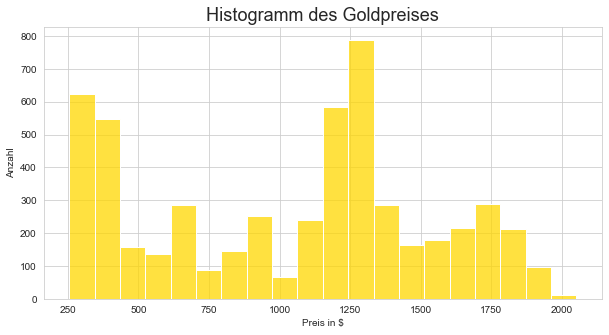

In [8]:
sns.set_style("whitegrid")
fig, axes = plt.subplots( figsize=(10,5))
sns.histplot(ax=axes,x="Gold", data=df_gold,color="#FFD700")
plt.xlabel("Preis in $")
plt.ylabel("Anzahl")
plt.title("Histogramm des Goldpreises", fontsize=18);
#hide_toggle()

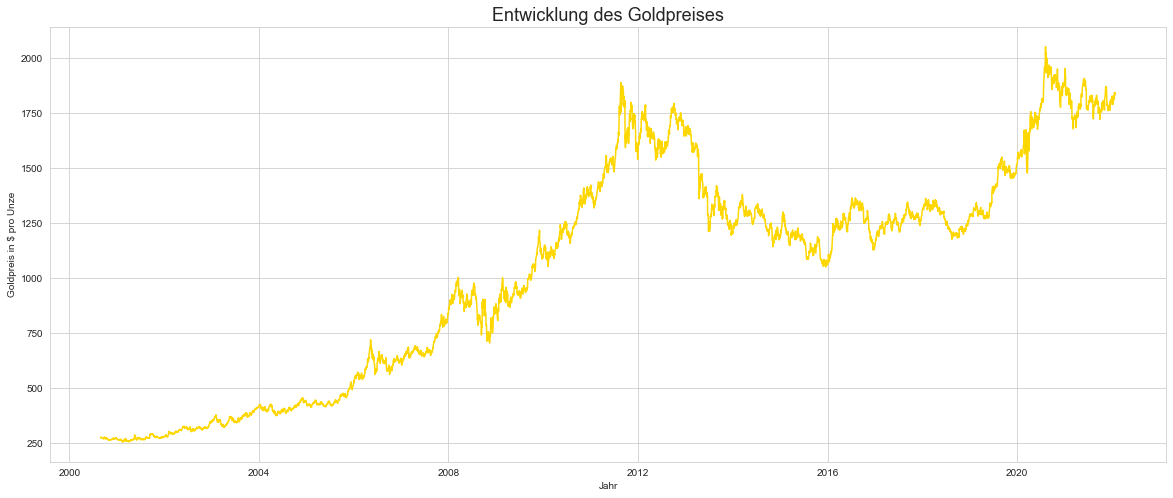

In [9]:
fig, axes = plt.subplots(1,1, figsize=(20,8))
plt.plot(df_gold["Date"], df_gold["Gold"],color="#FFD700")
plt.xlabel("Jahr")
plt.ylabel("Goldpreis in $ pro Unze")
plt.title("Entwicklung des Goldpreises", fontsize=18)
plt.grid(visible=True);
#hide_toggle()

#### Auffälligkeiten:
+ Deutliche Steigerung des Preises seit 2000.
+ Steigende Preise in Krisenzeiten, sinkende / stagnierende Preise in Hochkonjunktur / Niedrigzinsphase.

##### Krisenresistenz:
+ Stabile bis steigende Preise während und in Folge der Weltwirtschaftskrise 2008 und der Eurokrise 2010.
+ Seit Ausbruch der Covid Pandemie (12/2019) deutlicher Preisanstieg.
+ Zwischen 2013 und 2019 stagnierende bis sinkende Preise in Folge der Niedrigzinspolitik seit 2013.

In [10]:
alt.data_transformers.disable_max_rows()
alt.Chart(df_gold, title="Entwicklung des Goldpreises").mark_circle(size=20).encode(
    x=alt.X("Date:T", axis=alt.Axis(grid=True)),
    y=alt.Y("Gold", axis=alt.Axis(grid=True),scale=alt.Scale(zero=True)),
    color=alt.Color("Gold", scale=alt.Scale(scheme="plasma")),
    tooltip=["Date", "Gold"]).interactive().properties(width=800,height=400)

alt.Chart(...)

In [11]:
#df_gold_all = yf.download("GC=F",period="6mo")
#df_gold_all.to_csv("Gold_all.csv")
df_gold_all=pd.read_csv(r"..\Datensätze\Gold_all.csv")
df_gold_all["Date"] = pd.to_datetime(df_gold_all["Date"])
df_gold_all=df_gold_all.set_index("Date")

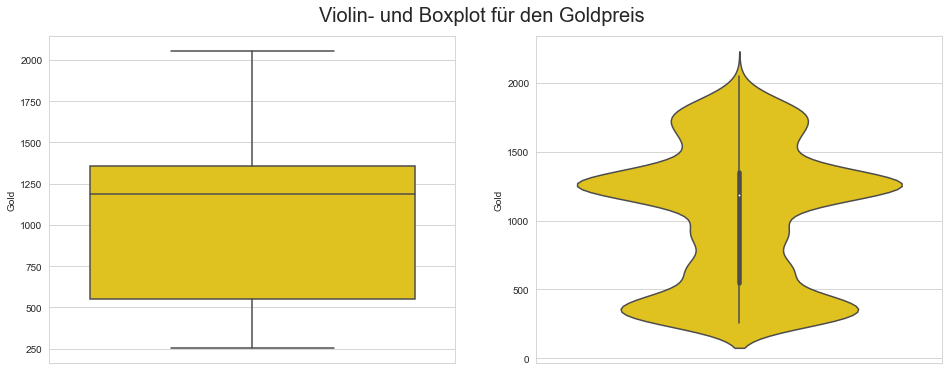

In [12]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(1,2, figsize=(16,6))
plt.suptitle("Violin- und Boxplot für den Goldpreis", fontsize=20, y=0.95)
sns.boxplot(y="Gold", data=df_gold, color="#FFD700",ax=axes[0])
sns.violinplot(y="Gold", data=df_gold, color="#FFD700",ax=axes[1]);

In [13]:
df_gold_percent_day=df_gold
df_gold_percent_day=df_gold_percent_day.set_index("Date")
df_gold_percent_day=df_gold_percent_day.pct_change()
df_gold_percent_day[["Gold"]] =df_gold_percent_day[["Gold"]].apply(lambda x: x*100)
df_gold_percent_day=df_gold_percent_day.reset_index()

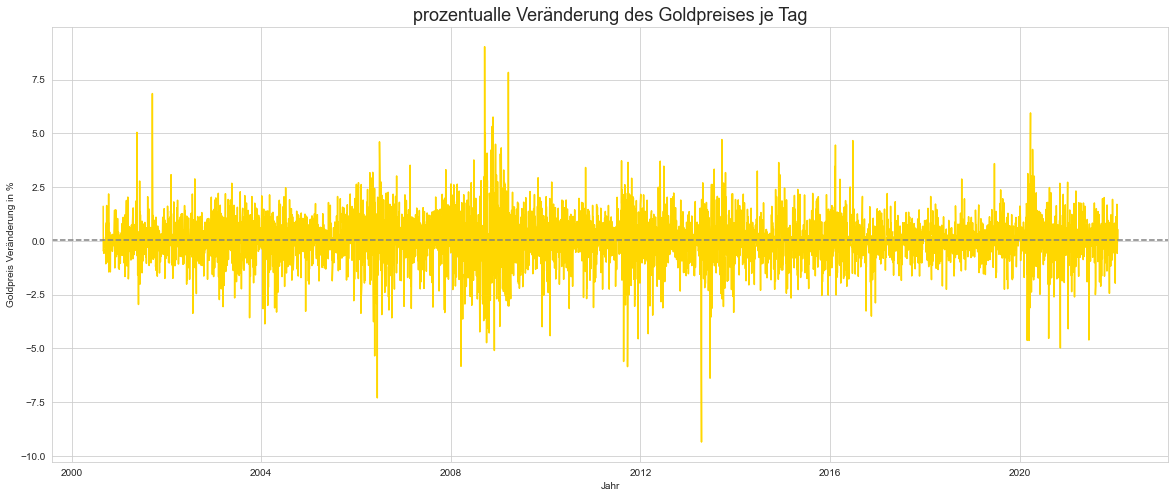

In [14]:
fig, axes = plt.subplots(1,1, figsize=(20,8))
plt.plot(df_gold_percent_day["Date"], df_gold_percent_day["Gold"],color="#FFD700")
plt.xlabel("Jahr")
plt.ylabel("Goldpreis Veränderung in %")
plt.title("prozentualle Veränderung des Goldpreises je Tag", fontsize=18)
#plt.axhline(y=0, color="grey")
plt.axhline(y=df_gold_percent_day["Gold"].mean(), color="grey",linestyle="dashed")
plt.grid(visible=True);

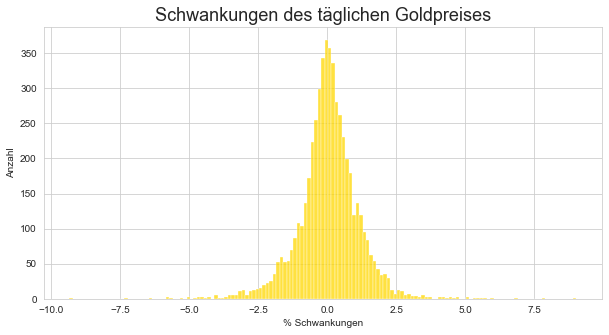

In [15]:
sns.set_style("whitegrid")
fig, axes = plt.subplots( figsize=(10,5))
sns.histplot(ax=axes,x="Gold", data=df_gold_percent_day,color="#FFD700")
plt.xlabel("% Schwankungen")
plt.ylabel("Anzahl")
plt.title("Schwankungen des täglichen Goldpreises", fontsize=18);

In [16]:
df_gold_month=df_gold
df_gold_month["Date"]= df_gold_month["Date"].astype(str)
df_gold_month["Year and Month"]= df_gold_month["Date"].str[0:7]
df_gold_month=df_gold_month.drop(columns=["Date"])
df_gold=df_gold.drop(columns=["Year and Month"])
df_gold_month=df_gold_month.groupby(["Year and Month"]).mean()

In [17]:
df_gold_percent=df_gold_month.pct_change(periods=1)
df_gold_percent[["Gold"]] =df_gold_percent[["Gold"]].apply(lambda x: x*100)
df_gold_percent=df_gold_percent.reset_index()

In [18]:
df_gold_percent["Year and Month"] = pd.to_datetime(df_gold_percent["Year and Month"])

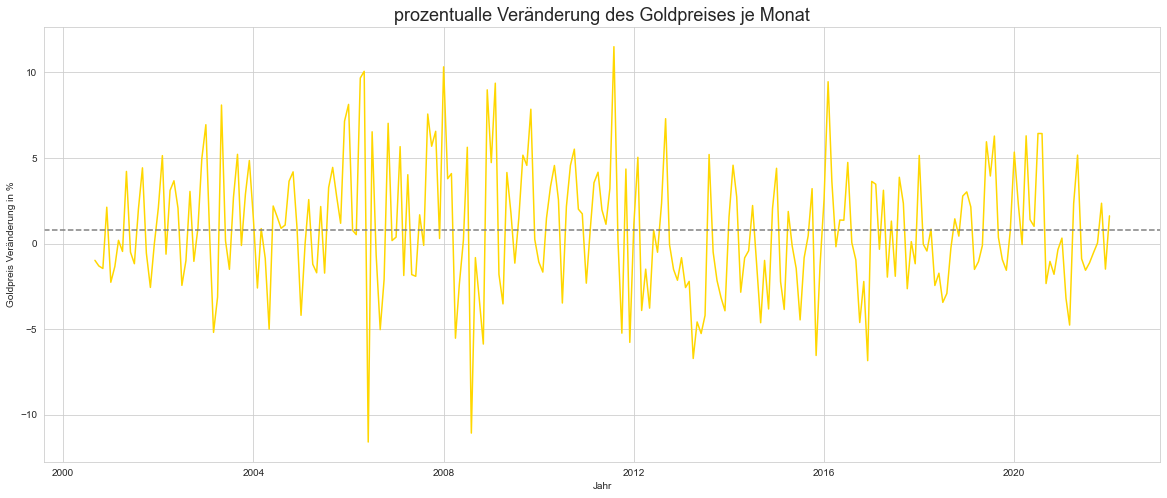

In [19]:
fig, axes = plt.subplots(1,1, figsize=(20,8))
plt.plot(df_gold_percent["Year and Month"], df_gold_percent["Gold"],color="#FFD700")
plt.xlabel("Jahr")
plt.ylabel("Goldpreis Veränderung in %")
plt.title("prozentualle Veränderung des Goldpreises je Monat", fontsize=18)
#plt.axhline(y=0, color="grey")
plt.axhline(y=df_gold_percent["Gold"].mean(), color="grey",linestyle="dashed")
plt.grid(visible=True);

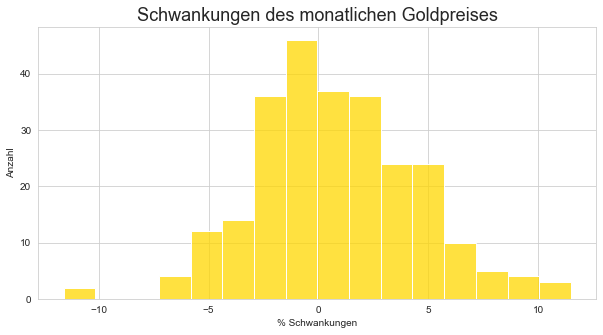

In [20]:
sns.set_style("whitegrid")
fig, axes = plt.subplots( figsize=(10,5))
sns.histplot(ax=axes,x="Gold", data=df_gold_percent,color="#FFD700")
plt.xlabel("% Schwankungen")
plt.ylabel("Anzahl")
plt.title("Schwankungen des monatlichen Goldpreises", fontsize=18);

#### Download der Daten des Bruttoinlandsprodukts der USA

In [21]:
#url1="https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GDP&scale=left&cosd=1947-01-01&coed=2021-07-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-01-16&revision_date=2022-01-16&nd=1947-01-01"
#df_gdp=pd.read_csv(url1)
#df_gdp.to_csv("GDP.csv",index=False)
df_gdp=pd.read_csv(r"..\Datensätze\GDP.csv")
df_gdp["DATE"] = pd.to_datetime(df_gdp["DATE"])
df_gdp.head()

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


#### Hinzufügen der % Veränderung des BIP

In [22]:
df_gdp_percent=df_gdp.set_index("DATE")
df_gdp_percent=df_gdp_percent.fillna(method="ffill")
df_gdp_percent=df_gdp_percent.pct_change()
df_gdp_percent[["GDP"]] =df_gdp_percent[["GDP"]].apply(lambda x: x*100)
df_gdp_percent=df_gdp_percent.reset_index()
df_gdp_all = df_gdp_percent.merge(df_gdp, on="DATE")
df_gdp_all=df_gdp_all.rename(columns={"GDP_x": "GDP in %", "GDP_y": "GDP absolut"})

In [23]:
df_gdp_all.head()

,DATE,GDP in %,GDP absolut
0,1947-01-01,NaN,243.164
1,1947-04-01,1.153131,245.968
2,1947-07-01,1.470516,249.585
3,1947-10-01,4.070757,259.745
4,1948-01-01,2.308803,265.742


#### Download der Daten des Zinssatzes der USA

In [24]:
#url2="https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=FEDFUNDS&scale=left&cosd=1954-07-01&coed=2021-12-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-01-17&revision_date=2022-01-17&nd=1954-07-01"
#df_rate=pd.read_csv(url2)
#df_rate.to_csv("FEDFUNDS.csv",index=False)
df_rate=pd.read_csv(r"..\Datensätze\FEDFUNDS.csv")
df_rate["DATE"] = pd.to_datetime(df_rate["DATE"])
df_rate.head()

,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


#### Download der Daten der Inflationsrate USA

In [25]:
#url3="https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CPALTT01USM659N&scale=left&cosd=1960-01-01&coed=2021-10-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-01-17&revision_date=2022-01-17&nd=1960-01-01"
#df_inflation=pd.read_csv(url3)
#df_infaltion.to_csv("CPALTT01USM659N.csv",index=False)
df_inflation=pd.read_csv(r"..\Datensätze\CPALTT01USM659N.csv")
df_inflation["DATE"] = pd.to_datetime(df_inflation["DATE"])
df_inflation.head()

,DATE,CPALTT01USM659N
0,1960-01-01,1.034483
1,1960-02-01,1.730104
2,1960-03-01,1.730104
3,1960-04-01,1.724138
4,1960-05-01,1.724138


#### Download der Arbeitslosenquote der USA

In [26]:
#url4="https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=UNRATE&scale=left&cosd=1948-01-01&coed=2021-12-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2022-01-18&revision_date=2022-01-18&nd=1948-01-01"
#df_unemployment=pd.read_csv(url4)
#df_unemployment.to_csv("UNRATE.csv",index=False)
df_unemployment=pd.read_csv(r"..\Datensätze\UNRATE.csv")
df_unemployment["DATE"] = pd.to_datetime(df_unemployment["DATE"])
df_unemployment.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


#### Explorative Datenanlyse BIP, Zinsrate, Inflationsrate, Arbeitslosenquote (USA)

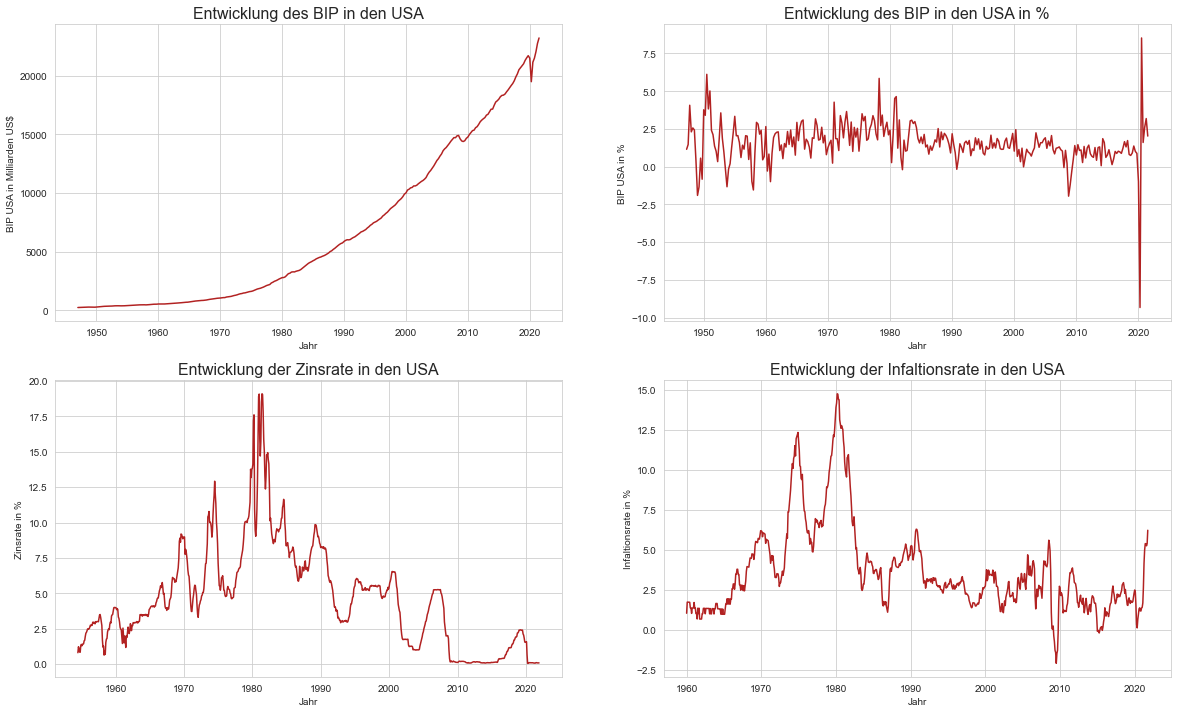

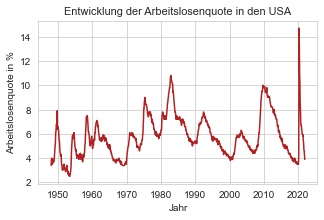

In [27]:
fig, axes = plt.subplots(2,2, figsize=(20,12))
axes[0,0].plot(df_gdp_all["DATE"], df_gdp_all["GDP absolut"],color="firebrick")
axes[0,0].set_xlabel("Jahr")
axes[0,0].set_ylabel("BIP USA in Milliarden US$")
axes[0,0].set_title("Entwicklung des BIP in den USA", fontsize=16)
axes[0,0].grid(visible=True)
axes[0,1].plot(df_gdp_all["DATE"], df_gdp_all["GDP in %"],color="firebrick")
axes[0,1].set_xlabel("Jahr")
axes[0,1].set_ylabel("BIP USA in %")
axes[0,1].set_title("Entwicklung des BIP in den USA in %", fontsize=16)
axes[0,1].grid(visible=True)
axes[1,0].plot(df_rate["DATE"], df_rate["FEDFUNDS"],color="firebrick")
axes[1,0].set_xlabel("Jahr")
axes[1,0].set_ylabel("Zinsrate in %")
axes[1,0].set_title("Entwicklung der Zinsrate in den USA", fontsize=16)
axes[1,0].grid(visible=True)
axes[1,1].plot(df_inflation["DATE"], df_inflation["CPALTT01USM659N"],color="firebrick")
axes[1,1].set_xlabel("Jahr")
axes[1,1].set_ylabel("Infaltionsrate in %")
axes[1,1].set_title("Entwicklung der Infaltionsrate in den USA", fontsize=16)
axes[1,1].grid(visible=True)
fig, axes = plt.subplots(1,1, figsize=(5,3))
plt.plot(df_unemployment["DATE"], df_unemployment["UNRATE"],color="firebrick")
plt.xlabel("Jahr")
plt.ylabel("Arbeitslosenquote in %")
plt.title("Entwicklung der Arbeitslosenquote in den USA", fontsize=11)
plt.grid(visible=True);
#hide_toggle()

#### Auffälligkeiten:
+ BIP steil ansteigend (Corona Einbruch besonders bei den %-Wachstumsraten sichtbar).
+ Zins- und Infaltionsrate stark schwankend (1980er Jahre sogar knapp 20% Zinsen und 15% Inflationsrate!).
+ momentan Niedrigzinsphase und Infaltion steigend.
+ Arbeitslosenquote auch stark schwankend (Corona Einbruch sichtbar).

Verbinden der Dataframes zu einem Dataframe

In [28]:
df_economic = df_rate.merge(df_gdp, on="DATE", how="outer").merge(df_inflation, on="DATE", how="outer").merge(df_unemployment, on="DATE", how="outer")
df_economic=df_economic.rename(columns={"DATE": "Date","GDP":"BIP absolut", "FEDFUNDS":"Zinssatz",
                                        "CPALTT01USM659N": "Infaltionsrate","UNRATE":"Arbeitslosenquote"})
df_economic.head()

,Date,Zinssatz,BIP absolut,Infaltionsrate,Arbeitslosenquote
0,1954-07-01,0.80,390.996,NaN,5.8
1,1954-08-01,1.22,NaN,NaN,6.0
2,1954-09-01,1.07,NaN,NaN,6.1
3,1954-10-01,0.85,399.734,NaN,5.7
4,1954-11-01,0.83,NaN,NaN,5.3


In [29]:
df_economic.describe()

,Zinssatz,BIP absolut,Infaltionsrate,Arbeitslosenquote
count,810.000000,299.000000,742.000000,888.000000
mean,4.638642,6561.012130,3.689739,5.760923
std,3.623159,6649.978236,2.818758,1.697227
min,0.050000,243.164000,-2.097161,2.500000
25%,1.812500,760.590000,1.738187,4.500000
50%,4.165000,4009.601000,2.950167,5.600000
75%,6.392500,11117.781000,4.594738,6.800000
max,19.100000,23202.344000,14.756447,14.700000


#### Download des Kursveralufes des Dow-Jones, Nasdaq Composite,S&P 500, Bitcoin, Etherum

In [30]:
#df_assets = yf.download("DJI ^IXIC ^GSPC BTC-USD ETH-USD",period="max")["Adj Close"]
#df_assets.to_csv("assets.csv")
df_assets=pd.read_csv(r"..\Datensätze\assets.csv")

In [31]:
df_assets["Date"] = pd.to_datetime(df_assets["Date"])
df_assets=df_assets.rename(columns={"DJI": "Dow-Jones", "^IXIC": "Nasdaq Composite", "^GSPC":"S&P 500",
                                       "BTC-USD": "Bitcoin", "ETH-USD": "Ethereum"})

In [32]:
df_assets.describe().apply(lambda x: x.apply('{0:.0f}'.format))

,Bitcoin,Dow-Jones,Ethereum,S&P 500,Nasdaq Composite
count,2688,12961,1539,18133,12855
mean,11050,7806,960,693,2151
std,15929,7850,1203,897,2875
min,178,578,84,17,55
25%,604,1028,190,87,251
50%,6253,4701,371,213,1166
75%,10344,11189,1221,1161,2606
max,67567,36800,4812,4797,16057


In [33]:
count=df_assets.drop(["Date"], axis=1)
count = pd.melt(count)
count=count.dropna()

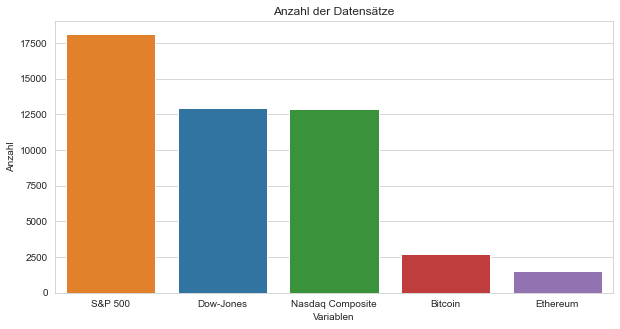

In [34]:
sns.set_style("whitegrid")
fig, axes = plt.subplots( figsize=(10,5))
sns.countplot(ax=axes,x="variable", data=count,
              palette=["tab:orange","tab:blue","tab:green","tab:red","tab:purple"],
             order = count["variable"].value_counts().index).set(title="Anzahl der Datensätze", 
                                                                 xlabel="Variablen", ylabel="Anzahl");

#### Explorative Datenanlyse  Kursveraluf Dow-Jones, Nasdaq Composite,S&P 500, Bitcoin, Etherum

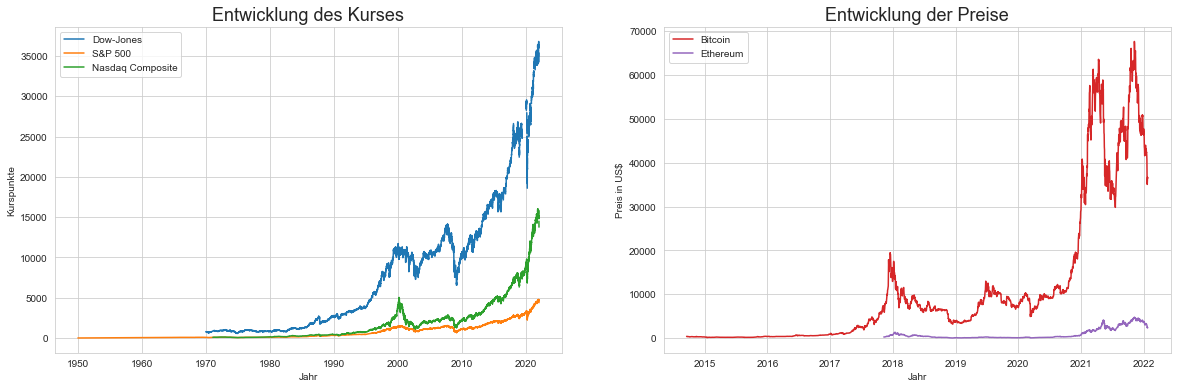

In [35]:
fig, axes = plt.subplots(1,2, figsize=(20,6))
axes[0].plot(df_assets["Date"], df_assets["Dow-Jones"],label="Dow-Jones",color="tab:blue")
axes[0].plot(df_assets["Date"], df_assets["S&P 500"],label="S&P 500",color="tab:orange")
axes[0].plot(df_assets["Date"], df_assets["Nasdaq Composite"],label="Nasdaq Composite",color="tab:green")
axes[0].set_xlabel("Jahr")
axes[0].set_ylabel("Kurspunkte")
axes[0].set_title("Entwicklung des Kurses", fontsize=18)
axes[0].legend()
axes[1].plot(df_assets["Date"], df_assets["Bitcoin"],label="Bitcoin",color="tab:red")
axes[1].plot(df_assets["Date"], df_assets["Ethereum"],label="Ethereum",color="tab:purple")
axes[1].set_xlabel("Jahr")
axes[1].set_ylabel("Preis in US$")
axes[1].set_title("Entwicklung der Preise", fontsize=18)
axes[1].legend();
#hide_toggle()

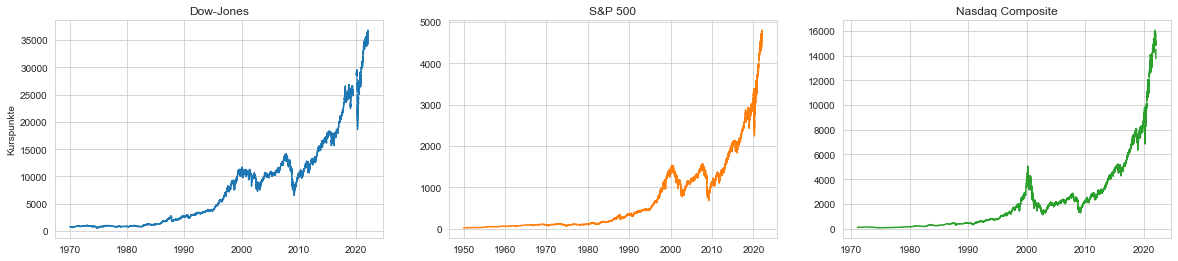

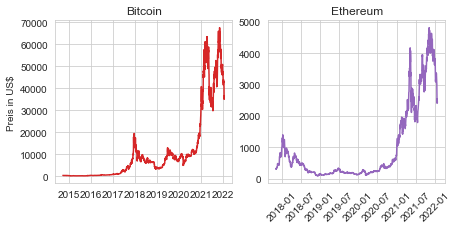

In [36]:
fig, axes = plt.subplots(1,3, figsize=(20,4))
axes[0].plot(df_assets["Date"], df_assets["Dow-Jones"])
axes[0].set_ylabel("Kurspunkte")
axes[0].title.set_text("Dow-Jones")
axes[1].plot(df_assets["Date"], df_assets["S&P 500"],color="tab:orange")
axes[1].title.set_text("S&P 500")
axes[2].plot(df_assets["Date"], df_assets["Nasdaq Composite"],color="tab:green")
axes[2].title.set_text("Nasdaq Composite")
fig, axes = plt.subplots(1,2, figsize=(7,3))
axes[0].plot(df_assets["Date"], df_assets["Bitcoin"],color="tab:red")
axes[0].set_ylabel("Preis in US$")
axes[0].title.set_text("Bitcoin")
axes[1].plot(df_assets["Date"], df_assets["Ethereum"],color="tab:purple")
axes[1].title.set_text("Ethereum")
plt.sca(axes[1])
plt.xticks(rotation=45);
#hide_toggle()

#### Auffälligkeiten:
+ Aktien Indizies steil steigend.
+ Kryptowährungen mit stärkeren Schwankungen und extremem Wachstum.

### Bewertung der Datenqualität <img src="https://raw.githubusercontent.com/tobiarnold/Gold-price/main/CRISP-DM_DP.PNG" width="100" height="100" align="right"/>

| Variable | Zeitraum | Frequenz | Quelle
| :- | :- | :- | :- |
| Goldpreis | 2000 – 2022 | täglich | yahoo finance |
| BIP USA | 1947 – 2021 | ¼ - jährlich | Federal Reserve Economic Data (FRED) |
| Zinssatz USA | 1994 – 2021 | monatlich | Federal Reserve Economic Data (FRED) |
| Inflationsrate USA | 1960 – 2021 | monatlich |Federal Reserve Economic Data (FRED) |
| Arbeitslosenquote USA | 1948 – 2021 | monatlich | Federal Reserve Economic Data (FRED) |
| Vergleichskurse (Dow-Jones, Nasdaq Composite, S&P 500, Bitcoin, Ethereum) | jeweiliges Maximum (1970 – 2022) | täglich | yahoo finance |


+ Ausreichend Daten pro Datensatz enthalten.<br>
+ Datensätze haben unterschiedliche Zeitintervalle (Werte pro Tag/Monat/Quartal).<br>
+ Ungleiche Jahresabdeckungen der Datensätze.<br>

# 3. Data Preparation <img src="https://raw.githubusercontent.com/tobiarnold/Gold-price/main/CRISP-DM_DP.PNG" width="100" height="100" align="right"/>

+ Transformieren der Zeitwerte "Dates" in Typ "Datetime".
+ Umbenennung der Spaltennamen -> eindeutige Namen.
+ Zusammenführen der Wirtschaftsdaten (Arbeitlosigkeitsquote, BIP etc).
+ Zusammenführen der Kursverläufe.
+ Zusammenführen aller Dataframes zu einem Datensatz -> Problem: unterschiedlich Zeitintervalle (Tag, Monat, Quartal).
+ Auffülen der NAN Werte -> Verzerrung der Daten.


#### Mergen aller Dataframes

In [37]:
#df_gold_month=df_gold
#df_gold_month["Date"]= df_gold_month["Date"].astype(str)
#df_gold_month["Year and Month"]= df_gold_month["Date"].str[0:7]
#df_gold_month=df_gold_month.drop(columns=["Date"])
#df_gold_month=df_gold_month.groupby(["Year and Month"]).mean()

In [38]:
#df_economic_month=df_economic
#df_economic_month["Date"]= df_economic_month["Date"].astype(str)
#df_economic_month["Year and Month"]=df_economic_month["Date"].str[0:7]
#df_economic_month=df_economic_month.drop(columns=["Date"])
#df_economic_month=df_economic_month.groupby(["Year and Month"]).mean()

In [39]:
#df_assets_month=df_assets
#df_assets_month["Date"]= df_assets_month["Date"].astype(str)
#df_assets_month["Year and Month"]=df_assets_month["Date"].str[0:7]
#df_assets_month=df_assets_month.drop(columns=["Date"])
#df_assets_month=df_assets_month.groupby(["Year and Month"]).mean()

In [40]:
#df_merge = df_gold_month.merge(df_assets_month, on="Year and Month",how="outer").merge(df_economic_month, on="Year and Month", how="outer")

In [41]:
df_gold["Date"] = pd.to_datetime(df_gold["Date"])
df_merge = df_gold.merge(df_assets, on="Date",how="outer").merge(df_economic, on="Date", how="outer")

In [42]:
df_merge = df_merge.dropna(subset=["Gold"])
df_merge[["Bitcoin","Ethereum"]] = df_merge[["Bitcoin","Ethereum"]].fillna(0)
df_merge=df_merge.fillna(method="ffill")
df_merge=df_merge.fillna(method="bfill")

In [43]:
df_merge.describe()

,Gold,Bitcoin,Dow-Jones,Ethereum,S&P 500,Nasdaq Composite,Zinssatz,BIP absolut,Infaltionsrate,Arbeitslosenquote
count,5370.000000,5370.000000,5370.000000,5370.000000,5370.000000,5370.000000,5370.000000,5370.000000,5370.000000,5370.000000
mean,1039.174190,3819.988782,15732.452403,190.056571,1793.343638,4317.973098,1.508270,15888.549815,2.227782,6.016518
std,498.413091,10756.043971,7055.517645,659.694896,882.911060,3301.248209,1.745189,3517.395684,1.385012,1.954680
min,255.100006,0.000000,6547.049805,0.000000,676.530029,1114.109985,0.050000,10660.465000,-2.097161,3.600000
25%,548.324997,0.000000,10493.450195,0.000000,1166.845001,2119.250000,0.130000,13142.642000,1.464789,4.600000
50%,1189.200012,0.000000,12742.550293,0.000000,1403.320007,2764.719971,0.980000,15557.535000,2.107585,5.500000
75%,1354.125031,655.215012,18428.974609,0.000000,2166.812439,5234.494873,2.160000,18775.459000,2.990756,7.200000
max,2051.500000,67566.828125,36799.699219,4812.087402,4796.560059,16057.440430,6.520000,23202.344000,6.221869,14.700000


# 3. Data Preparation <img src="https://raw.githubusercontent.com/tobiarnold/Gold-price/main/CRISP-DM_DP.PNG" width="100" height="100" align="right"/>

#### Berechnung der Korrelation

In [44]:
#profile = ProfileReport(df_merge)
#profile

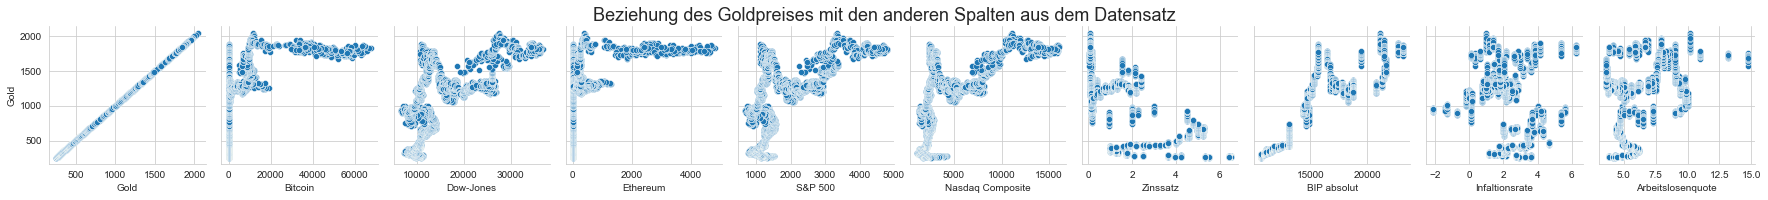

In [45]:
g =sns.pairplot(data=df_merge ,y_vars = ["Gold"],diag_kind = None)
g.fig.suptitle("Beziehung des Goldpreises mit den anderen Spalten aus dem Datensatz",y=1.07, fontsize=18);

In [46]:
corr_merge=df_merge.corr()
corr_merge.style.applymap(lambda x: "background-color : yellow" if x ==1 else "")

,Gold,Bitcoin,Dow-Jones,Ethereum,S&P 500,Nasdaq Composite,Zinssatz,BIP absolut,Infaltionsrate,Arbeitslosenquote
Gold,1.000000,0.457572,0.685205,0.389935,0.660394,0.670140,-0.624738,0.856564,-0.095346,0.332003
Bitcoin,0.457572,1.000000,0.767117,0.943585,0.804307,0.848244,-0.203499,0.596727,0.351668,-0.127173
Dow-Jones,0.685205,0.767117,1.000000,0.680047,0.993647,0.976943,-0.256779,0.908423,0.131438,-0.264320
Ethereum,0.389935,0.943585,0.680047,1.000000,0.724880,0.763258,-0.183790,0.512431,0.433332,-0.138774
S&P 500,0.660394,0.804307,0.993647,0.724880,1.000000,0.989836,-0.237938,0.887619,0.160863,-0.265460
Nasdaq Composite,0.670140,0.848244,0.976943,0.763258,0.989836,1.000000,-0.281257,0.867948,0.157352,-0.182135
Zinssatz,-0.624738,-0.203499,-0.256779,-0.183790,-0.237938,-0.281257,1.000000,-0.476194,0.395875,-0.552627
BIP absolut,0.856564,0.596727,0.908423,0.512431,0.887619,0.867948,-0.476194,1.000000,-0.051428,-0.067413
Infaltionsrate,-0.095346,0.351668,0.131438,0.433332,0.160863,0.157352,0.395875,-0.051428,1.000000,-0.351076
Arbeitslosenquote,0.332003,-0.127173,-0.264320,-0.138774,-0.265460,-0.182135,-0.552627,-0.067413,-0.351076,1.000000


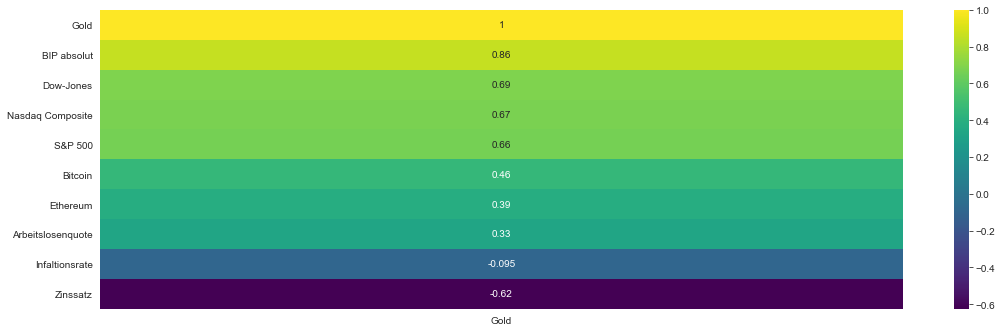

In [47]:
plt.figure(figsize=(18,5.5))
corr_gold= corr_merge[["Gold"]]
corr_gold=corr_gold.sort_values(by="Gold", ascending=False)
sns.heatmap(corr_gold, cmap="viridis",annot=True)
plt.show()
#hide_toggle()

# 3. Data Preparation <img src="https://raw.githubusercontent.com/tobiarnold/Gold-price/main/CRISP-DM_DP.PNG" width="100" height="100" align="right"/>

#### Interpretation der Daten nach Zusammenführung

+ Goldpreis weist die höchste Korrelation mit dem BIP auf.
+ Höchste negative Korrelation mit dem Zinssatz.
 
+ Zinssatz hat negativen Einfluss auf Goldpreis (steigende Zinsen sorgen dafür, dass Anleger ihr Geld eher in Produkte mit Zinsen anlegen z.B. Anleihen oder Tagesgeld).

In [48]:
df_merge=df_merge[["Date","Gold","BIP absolut","Dow-Jones","Zinssatz"]]

# 4. Modellierung
*Einfache Visualisierungen für initiale Analysen bis hin zur komplexen Modellierung mit Trainings- und Testdaten.[1]*

<div>
<img src="https://raw.githubusercontent.com/tobiarnold/Gold-price/main/CRISP-DM_M.png" width="450" height="450" align="center"/>
</div>

# 4. Modellierung <img src="https://raw.githubusercontent.com/tobiarnold/Gold-price/main/CRISP-DM_M.png" width="100" height="100" align="right"/>
Folgende Modelle wurden erstellt:

+ Simple Multiple Regression
+ Random Forest
+ ARIMA
+ LSTM

# 4. Modellierung <img src="https://raw.githubusercontent.com/tobiarnold/Gold-price/main/CRISP-DM_M.png" width="100" height="100" align="right"/>

#### Simple Multiple Regression

Lineare Regression zur Vorhersage einer abhängigen Variablen mithilfe mehrerer unabhängigen Variablen. [2]

$ \hat{Y} = \hat{\beta}_{0} + \sum \limits _{j=1} ^{p} X_{j}\hat{\beta}_{j} $

#### Random Forest Regression

Algorithmus basierend auf einer "Baumstruktur", bei der eine Vielzahl an zufällig ausgewählten Entscheidungsbäumen generiert wird. [3]<br>

# 4. Modellierung <img src="https://raw.githubusercontent.com/tobiarnold/Gold-price/main/CRISP-DM_M.png" width="100" height="100" align="right"/>

#### ARIMA

+ Methode zur Beschreibung und Analyse von Zeitreihen.<br>
+ Kombination autoregressiver (AR) und Moving-Average (MA) Prozesse.<br>
+ Möglichkeit zur Analyse von Zeitreihen mit Trendverläufen durch Herstellung von Stationarität (Erweiterung zum ARMA-Modell). [4]

#### Long Short-Term Memory (LSTM)

+ Beschreibung rekurrenter neuronaler Netze (RNN), durch die sich eine Art „langes Kurzzeitgedächtnis“ integrieren lässt.<br>
+ Mithilfe von RNNs können Langzeit-Abhängigkeiten und frühere Erfahrungen besser verarbeitet werden.<br>
+ Kommt u.a. bei der Spracherkennung und Zeitreihen-Vorhersage zum Einsatz. [5]

In [49]:
from sklearn import linear_model 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV
from pycaret.regression import *

### Simple Multiple Regression

Ansatz: Vorhersage des Goldpreises in Abhängigkeit der wirtschaftlichen Faktoren.<br>
X: unabhängige Variable (BIP, Dow-Jones, Zinssatz)<br>
y: abhängige Variable (Goldpreis)

In [50]:
X = df_merge[["BIP absolut", "Dow-Jones","Zinssatz"]]
y = df_merge["Gold"]

In [51]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [52]:
df_merge.tail()

,Date,Gold,BIP absolut,Dow-Jones,Zinssatz
5365,2022-01-19,1843.099976,23202.344,35028.601562,0.08
5366,2022-01-20,1842.500000,23202.344,34715.398438,0.08
5367,2022-01-21,1831.800049,23202.344,34265.398438,0.08
5368,2022-01-24,1841.699951,23202.344,34364.500000,0.08
5369,2022-01-25,1842.900024,23202.344,34364.500000,0.08


#### Funktion zur Prognose des Goldpreises mit Eingabe der unabhängigen Variablen (BIP, Dow-Jones und Zinssatz)

In [53]:
def lin_predict():
    try:
        print("BIP absolut eingeben")
        BIP_absolut = float(input())
        print("Dow_Jones Kurs eingeben")
        Dow_Jones = float(input())
        print("Zinssatz eingeben")
        Zinssatz = float(input())   
        predicted_price = regr.predict([[BIP_absolut, Dow_Jones, Zinssatz]])
        print("Der Goldpreis beträgt: ",predicted_price)
    except:
        print("Berechnung nicht möglich")
#lin_predict() 

In [54]:
r_sq = regr.score (X, y)
print("Bestimmtheitsmaß: ",r_sq)

Bestimmtheitsmaß:  0.8086265314338428


### Fazit zur Simple Multiple Regression


+ Güte des Modells ausbaufähig.
+ Anzahl unabhängiger Variablen beeinflusst Güte des Modells bzw. erschwert die Vorhersage.

## Komplexere Modellierung

Vergleich aller gängigen Regressionsverfahren mittels PyCaret Bibliothek.<br>
Durchführung des Verfahrens mit dem besten Ergebnis.<br>
Aufteilen in Trainings- und Testdaten.

In [55]:
py_caret = setup(data = df_merge, target = "Gold", session_id=42)
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,15.3976,612.4419,24.6230,0.9975,0.0214,0.0148,1.1640
lightgbm,Light Gradient Boosting Machine,17.2750,673.7363,25.8500,0.9972,0.0234,0.0172,0.4250
et,Extra Trees Regressor,17.1719,750.7534,27.2493,0.9969,0.0238,0.0166,1.2800
dt,Decision Tree Regressor,18.5899,1006.8517,31.4310,0.9959,0.0270,0.0179,0.0360
gbr,Gradient Boosting Regressor,27.2853,1458.2291,38.1397,0.9940,0.0373,0.0282,0.3470
knn,K Neighbors Regressor,28.5936,2440.1082,49.0755,0.9899,0.0439,0.0284,0.0630
ada,AdaBoost Regressor,65.8823,6997.2860,82.4485,0.9712,0.1073,0.0834,0.1910
lasso,Lasso Regression,178.1118,48550.0355,220.1766,0.7992,0.3000,0.2179,0.0430
br,Bayesian Ridge,178.3125,48666.4125,220.4436,0.7988,0.2984,0.2176,0.0240
lr,Linear Regression,178.8037,48815.8336,220.7922,0.7982,0.3099,0.2190,1.4700


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [56]:
X = df_merge[["BIP absolut", "Dow-Jones","Zinssatz"]].values
y = df_merge["Gold"].values

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [58]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [59]:
model_random_forest_regressor=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)
model_random_forest_regressor.fit(X_train, y_train)
y_pred_random_forest_regressor = model_random_forest_regressor.predict(X_test)
model_random_forest_regressor_train=model_random_forest_regressor.score(X_train, y_train)
model_random_forest_regressor_test=model_random_forest_regressor.score(X_test, y_test)
print("Trainingsdaten:",model_random_forest_regressor_train)
print("Testdaten:",model_random_forest_regressor_test)
print("MSE:", mean_squared_error(y_test, y_pred_random_forest_regressor))

Trainingsdaten: 0.9994441260310342
Testdaten: 0.9960774915314091
MSE: 1031.3606228310296


Sehr hoher Score bei Trainings- und Testdaten.

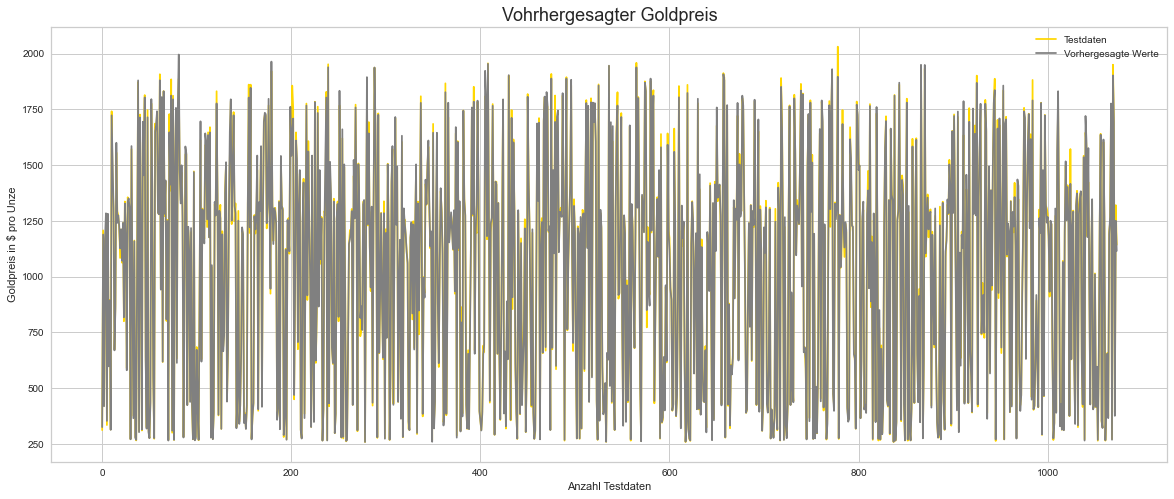

In [60]:
fig, axes = plt.subplots(1,1, figsize=(20,8))
plt.plot(y_test, color="#FFD700", label = "Testdaten")
plt.plot(y_pred_random_forest_regressor, color="grey", label="Vorhergesagte Werte")
plt.title("Vohrhergesagter Goldpreis", fontsize=18)
plt.xlabel("Anzahl Testdaten")
plt.ylabel("Goldpreis in $ pro Unze")
plt.legend()
plt.show()

sortieren der Trainigsdaten aufsteigend zur besseren Übersichtlichkeit

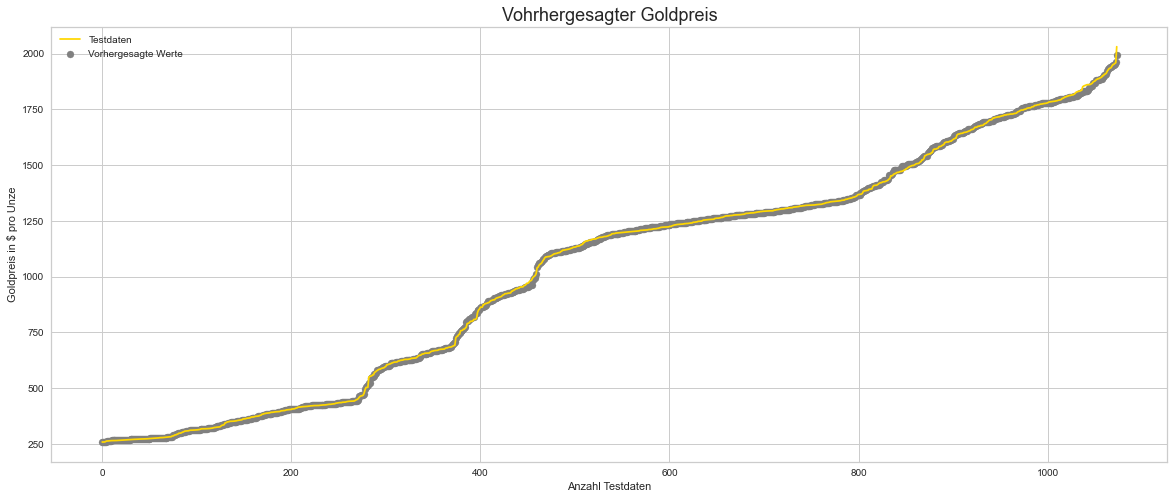

In [61]:
fig, axes = plt.subplots(1,1, figsize=(20,8))
y_test.sort() # Sortierung nach den Testdaten
y_pred_random_forest_regressor.sort()
x=range(0,len(y_test),1) 
plt.plot(x, y_test, color="#FFD700", label = "Testdaten")
plt.scatter(x, y_pred_random_forest_regressor, color="grey", label="Vorhergesagte Werte")
plt.title("Vohrhergesagter Goldpreis", fontsize=18)
plt.xlabel("Anzahl Testdaten")
plt.ylabel("Goldpreis in $ pro Unze")
plt.legend()
plt.show()
#hide_toggle()

In [62]:
df_merge.tail()

,Date,Gold,BIP absolut,Dow-Jones,Zinssatz
5365,2022-01-19,1843.099976,23202.344,35028.601562,0.08
5366,2022-01-20,1842.500000,23202.344,34715.398438,0.08
5367,2022-01-21,1831.800049,23202.344,34265.398438,0.08
5368,2022-01-24,1841.699951,23202.344,34364.500000,0.08
5369,2022-01-25,1842.900024,23202.344,34364.500000,0.08


#### Funktion zur Prognose des Goldpreises mit Eingabe der unabhängigen Variablen (BIP, Dow-Jones und Zinssatz)

In [63]:
def forest_regressor_predict():
    try:
        print("BIP absolut eingeben")
        BIP_absolut = float(input())
        print("Dow_Jones Kurs eingeben")
        Dow_Jones = float(input())
        print("Zinssatz eingeben")
        Zinssatz = float(input())   
        X_gold = np.array([BIP_absolut,Dow_Jones,Zinssatz]).reshape(1,-1)
        X_gold_scaled=sc.transform(X_gold)
        X_gold_result = model_random_forest_regressor.predict(X_gold_scaled)
        X_gold_result=np.round(X_gold_result,2)
        print("Der Goldpreis beträgt:",X_gold_result, "$")
    except:
        print("Berechnung nicht möglich")
#forest_regressor_predict()

### Fazit zur Random Forest Regression

+ Daten sind überangepasst.<br>
+ Modell funktioniert sehr gut bei bekannten Daten (siehe Score der Trainings- und Testdaten). <br>
+ Für eine Vorhersage ist das Modell jedoch ungeeignet, da nur bekannte Werte ausgegeben werden können.

#### Anpassung des ursprünglichen Ziels

+ Verwerfen der Idee der Vorhersage unter Einfluss der wirtschaftlichen Faktoren.
+ Neues Ziel: Vorhersage für einen gewissen Zeitraum mithilfe von Zeitreihen-Analysen.

## Zeitreihen Untersuchung (Time Series) mit Arima

Zeitreihen: Annahme, dass Goldpreis nur anhand der Zeitdaten vorausgesagt werden kann (Abhängigkeit von der Zeit).

In [64]:
import statsmodels.api as sm
import warnings 
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima.utils import ndiffs

In [65]:
df_gold=pd.read_csv(r"..\Datensätze\Gold.csv")
df_gold=df_gold.rename(columns={"Adj Close": "Gold"})

In [66]:
df_gold_month=df_gold
df_gold_month["Date"]= df_gold_month["Date"].astype(str)
df_gold_month["Year and Month"]= df_gold_month["Date"].str[0:7]
df_gold_month=df_gold_month.drop(columns=["Date"])
df_gold=df_gold.drop(columns=["Year and Month"])
df_gold_month=df_gold_month.groupby(["Year and Month"]).mean()
df_gold_month=df_gold_month.reset_index()
df_gold_month["Year and Month"] = pd.to_datetime(df_gold_month["Year and Month"])
df_gold_month=df_gold_month.set_index("Year and Month")

In [67]:
df_gold["Date"] = pd.to_datetime(df_gold["Date"])
df_gold=df_gold.set_index("Date")
df_gold.head()

,Gold
Date,
2000-08-30,273.899994
2000-08-31,278.299988
2000-09-01,277.000000
2000-09-05,275.799988
2000-09-06,274.200012


#### Vorraussetzungen

Daten zur Zeitreihenuntersuchung müssen stationär sein, d.h. konstanter Mittelwert und konstante Varianz.<br>

Augmented Dickey-Fuller-Test (Adfuller-Test) zur Überprüfung der Stationarität.<br>
Bibliothek "statsmodels" stellt adfuller Test zur Verfügung.<br>
p-Wert muss kleiner 0.05 sein.

In [68]:
def adfuller_test(gold):
    result=adfuller(gold)
    labels = ["ADF Test Statistic","p-value","#Lags Used","Number of Observations Used"]
    for value,label in zip(result,labels):
        print(label+" : "+str(value) )
    if result[1] <= 0.05:
        print("Daten sind wahrscheinlich stationär")
    else:
        print("Daten sind wahrscheinlich nicht stationär") 

### Modellierung der Zeitreihen-Analyse für Vorhersage der Tageswerte

In [69]:
adfuller_test(df_gold["Gold"])

ADF Test Statistic : -0.7845535019866351
p-value : 0.823617305919291
#Lags Used : 11
Number of Observations Used : 5358
Daten sind wahrscheinlich nicht stationär


ndiffs zur Überprüfung, wie oft die Daten mindestens differenziert werden müssen, um Stationarität zu erreichen.

In [70]:
ndiffs(df_gold.Gold, test="adf")
#d: 1

1

Vorgeschalgene Differenzierungen gem. ndiffs: 1
Durchgeführte Differenzierungen: 2

In [71]:
diff = df_gold.Gold.diff().diff().dropna()

In [72]:
adfuller_test(diff)

ADF Test Statistic : -22.07448609550988
p-value : 0.0
#Lags Used : 32
Number of Observations Used : 5335
Daten sind wahrscheinlich stationär


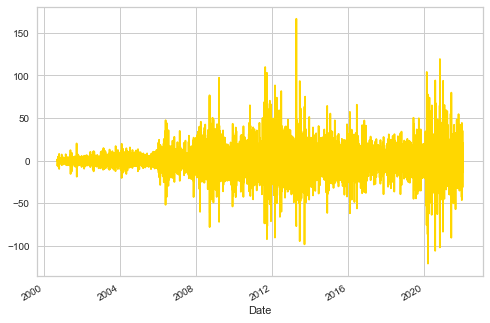

In [73]:
diff.plot(color="#FFD700");

In [74]:
diff=diff.to_frame()
diff.head()

,Gold
Date,
2000-09-01,-5.699982
2000-09-05,0.099976
2000-09-06,-0.399963
2000-09-07,1.399963
2000-09-08,-0.500000


#### Auswahl der Parameter

+ q: gleitender Durchschnitt; hier bei 1
+ p: Autokorrelation: Beobachtungen, die über die Zeit von sich selber abhängen; hier bei 1

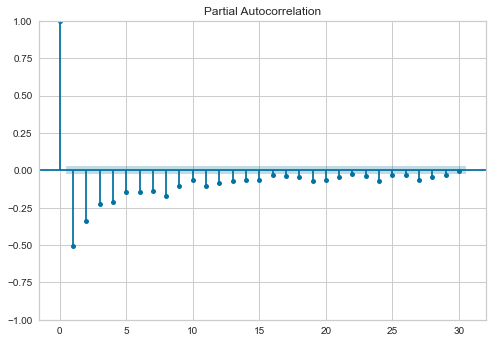

In [75]:
sm.graphics.tsa.plot_pacf(diff["Gold"], lags=30);
#p: 1

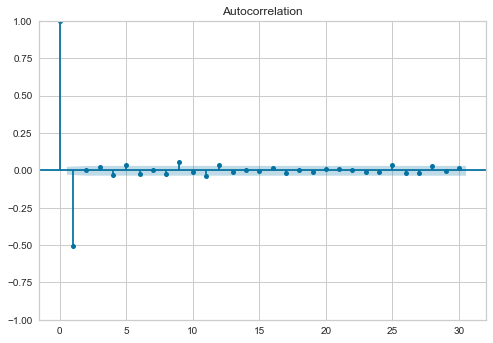

In [76]:
sm.graphics.tsa.plot_acf(diff["Gold"], lags=30);
#q: 1

In [77]:
#p, d, q
#    p: number of autoregressive terms (AR order) 
#    d: number of nonseasonal differences (differencing order)
#    q: number of moving-average terms (MA order)
model_arima_daily=ARIMA(df_gold["Gold"].fillna(value=df_gold["Gold"].mean()),order=(1,2,1))
model_arima_daily_fit=model_arima_daily.fit()

In [78]:
forecast_arima_daily=model_arima_daily_fit.forecast(steps=30)
forecast_arima_daily

5370    1843.180679
5371    1843.473144
5372    1843.765457
5373    1844.057772
5374    1844.350087
5375    1844.642402
5376    1844.934716
5377    1845.227031
5378    1845.519346
5379    1845.811661
5380    1846.103976
5381    1846.396291
5382    1846.688606
5383    1846.980920
5384    1847.273235
5385    1847.565550
5386    1847.857865
5387    1848.150180
5388    1848.442495
5389    1848.734810
5390    1849.027124
5391    1849.319439
5392    1849.611754
5393    1849.904069
5394    1850.196384
5395    1850.488699
5396    1850.781014
5397    1851.073328
5398    1851.365643
5399    1851.657958
Name: predicted_mean, dtype: float64

In [79]:
forecast_arima_daily=forecast_arima_daily.to_frame()
forecast_arima_daily["date"] = pd.date_range(start="2022-01-26", periods=len(forecast_arima_daily), freq="D")

In [80]:
forecast_arima_daily=forecast_arima_daily.set_index("date")

In [81]:
frames = [df_gold, forecast_arima_daily]
gold_forecast_daily=pd.concat(frames)
gold_forecast_daily.drop(gold_forecast_daily.tail(1).index,inplace=True)

In [82]:
print(model_arima_daily_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Gold   No. Observations:                 5370
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -21279.391
Date:                Thu, 24 Feb 2022   AIC                          42564.782
Time:                        22:01:35   BIC                          42584.547
Sample:                             0   HQIC                         42571.684
                               - 5370                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0128      0.008     -1.586      0.113      -0.029       0.003
ma.L1         -1.0000      0.008   -122.719      0.000      -1.016      -0.984
sigma2       162.1931      2.073     78.255      0.0

#### Interpretation der Ergebnisse

+ Variablen mit p > 0.05 sind nicht statistisch relevant.
+ Prob(Q) > 0.05 bedeutet, dass die Nullhypthose des weißen Rauschens für die Fehler nicht abgelehnt werden kann.
    * "Realisationen von weißem Rauschen haben einen Erwartungswert von null, eine endliche und konstante Varianz und die Autokovarianzen sind gleich null." [6]
+ Heteroskedaszität: Test auf Nullhypthoese, dass die Varianz der Störterme konstant ist.
    * in diesem Fall kann die Nullhypothese nicht bestätigt werden und die Störterme weisen eine Varianz auf.
+ Jarque-Bera: Test auf Normalverteilung.
    * hoher Wert und Prob(JB) von 0.00 bedeutet, dass die Daten nicht normalverteilt sind.

In [83]:
gold_forecast_daily.tail(7)

,Gold,predicted_mean
2022-02-17,NaN,1849.611754
2022-02-18,NaN,1849.904069
2022-02-19,NaN,1850.196384
2022-02-20,NaN,1850.488699
2022-02-21,NaN,1850.781014
2022-02-22,NaN,1851.073328
2022-02-23,NaN,1851.365643


In [84]:
gold_forecast_2020=gold_forecast_daily.loc["20211001":]

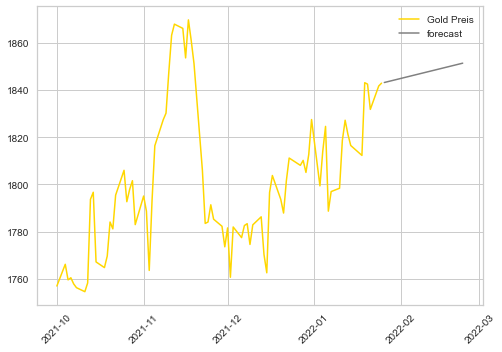

In [85]:
plt.plot(gold_forecast_2020["Gold"],color="#FFD700",label="Gold Preis", linewidth=1.5)
plt.plot(gold_forecast_2020["predicted_mean"],color="grey", label="forecast", linewidth=1.5);
plt.legend()
plt.xticks(rotation=45);
#hide_toggle()

#### Aufteilung der Daten in Trainings- und Testdaten

+ Trainingsdaten bis einschließlich 2018.
+ Testdaten ab 2019

In [86]:
train_gold = df_gold.loc[:"2018"]
test_gold = df_gold.loc["2019":]
train_gold.shape

(4596, 1)

In [87]:
diff_test = test_gold.Gold.diff().diff().dropna()

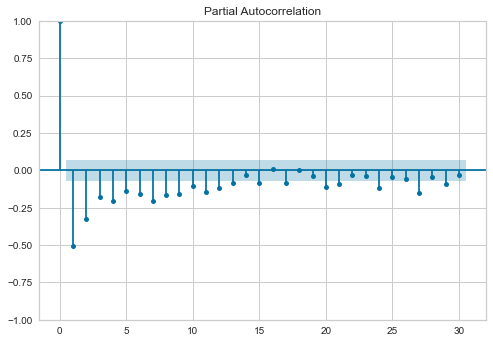

In [88]:
sm.graphics.tsa.plot_pacf(diff_test, lags=30);
#p: 1

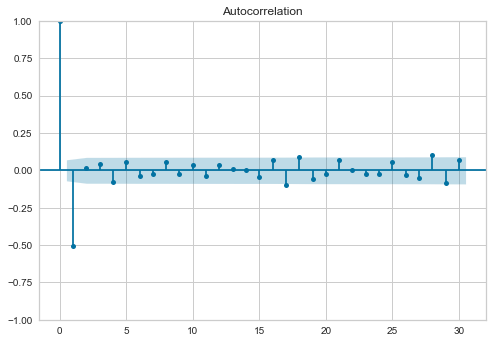

In [89]:
sm.graphics.tsa.plot_acf(diff_test, lags=30);
#q: 1

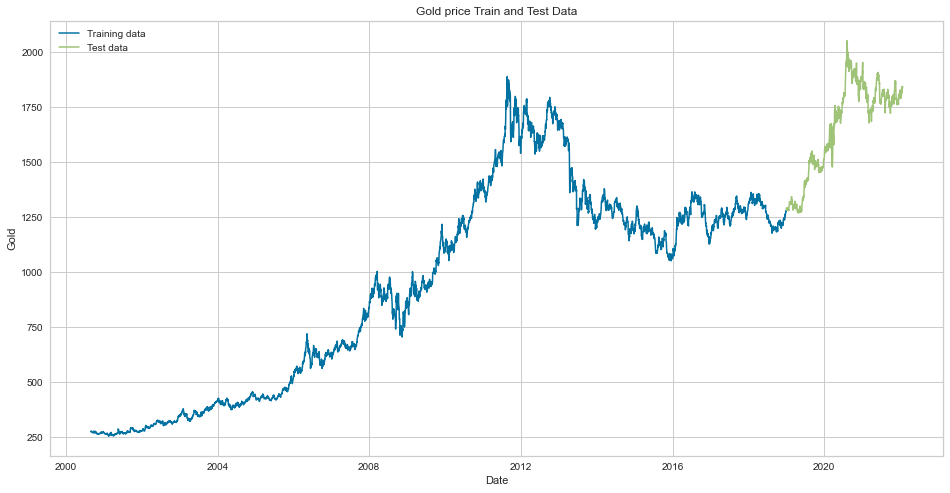

In [90]:
plt.figure(figsize=(16,8))
sns.lineplot(x=train_gold.index, y="Gold", data=train_gold, linewidth=1.5, label="Training data").set_title("Gold price Train and Test Data")
sns.lineplot(x=test_gold.index, y="Gold", data=test_gold, linewidth=1.5, label='Test data')
plt.show()
#hide_toggle()

In [91]:
#### Vorbereitung und Darstellung der Vorhersage auf Basis der Trainingsdaten

In [92]:
#p, d, q
model_arima_train=ARIMA(train_gold["Gold"].fillna(value=df_gold["Gold"].mean()),order=(1,2,1))

In [93]:
arima_train = model_arima_train.fit()

In [94]:
arima_forecast = arima_train.get_forecast(steps=len(test_gold))

In [95]:
auto_arima_mean_forecast = arima_forecast.predicted_mean

In [96]:
auto_arima_mean_forecast_df = auto_arima_mean_forecast.to_frame(name='forecasted_mean')
auto_arima_mean_forecast_df.index = test_gold.index

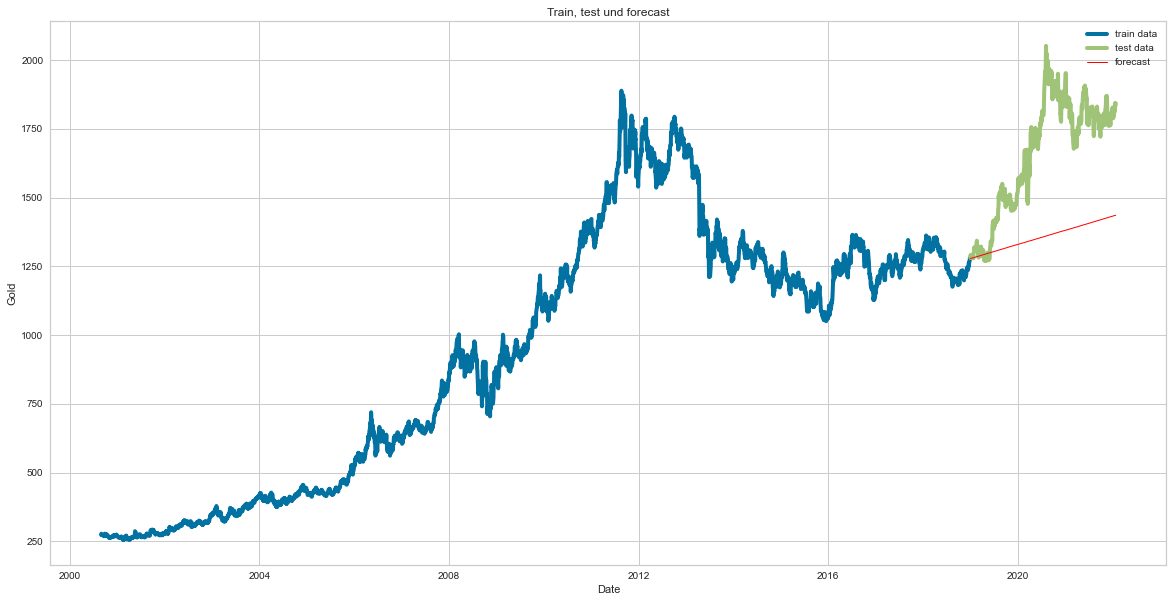

In [97]:
plt.figure(figsize=(20,10))
sns.lineplot(x=train_gold.index, y="Gold", data=train_gold, linewidth=4, label="train data").set_title("Train, test und forecast")
sns.lineplot(x=test_gold.index, y="Gold", data=test_gold, linewidth=4, label="test data")
sns.lineplot(x=auto_arima_mean_forecast_df.index, y=auto_arima_mean_forecast_df["forecasted_mean"], data=auto_arima_mean_forecast_df, linewidth=1, label="forecast", color="red");
#hide_toggle()

Modell zu statisch. Beschreibt Daten am Anfang gut, dann deutlich zu flach.

In [98]:
auto_arima_mean_forecast_df.head()

,forecasted_mean
Date,
2019-01-02,1278.528310
2019-01-03,1278.731473
2019-01-04,1278.934980
2019-01-07,1279.138483
2019-01-08,1279.341986


In [99]:
test_gold.head()

,Gold
Date,
2019-01-02,1281.000000
2019-01-03,1291.800049
2019-01-04,1282.699951
2019-01-07,1286.800049
2019-01-08,1283.199951


#### Anpassung der Parameter

In [100]:
#p, d, q
model_arima_train=ARIMA(train_gold["Gold"].fillna(value=df_gold["Gold"].mean()),order=(9,3,9))

In [101]:
arima_train = model_arima_train.fit()

In [102]:
arima_forecast = arima_train.get_forecast(steps=len(test_gold))
auto_arima_mean_forecast = arima_forecast.predicted_mean
auto_arima_mean_forecast_df = auto_arima_mean_forecast.to_frame(name="forecasted_mean")
auto_arima_mean_forecast_df.index = test_gold.index

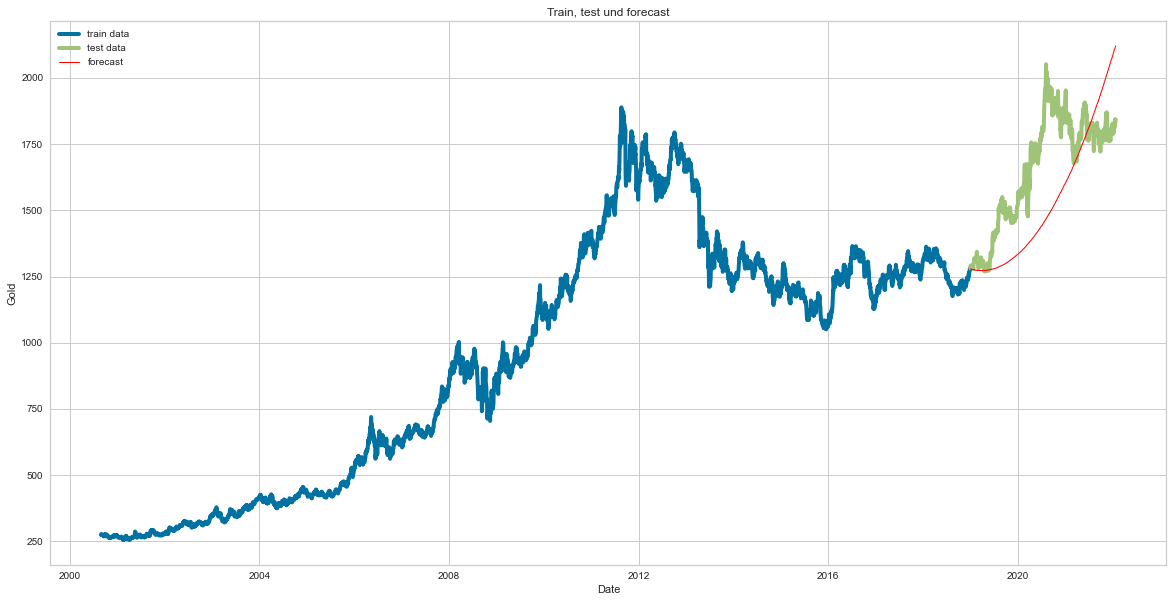

In [103]:
plt.figure(figsize=(20,10))
sns.lineplot(x=train_gold.index, y="Gold", data=train_gold, linewidth=4, label="train data").set_title("Train, test und forecast")
sns.lineplot(x=test_gold.index, y="Gold", data=test_gold, linewidth=4, label="test data")
sns.lineplot(x=auto_arima_mean_forecast_df.index, y=auto_arima_mean_forecast_df["forecasted_mean"], data=auto_arima_mean_forecast_df, linewidth=1, label='forecast', color="red");
#hide_toggle()

Insgesamt sehr schwierig mit Arima Daten, je weiter diese in der Zukunft liegen, gut abzubilden.

### Modellierung der Zeitreihen-Analyse für Vorhersage der Monatswerte

Test von Arima mittels Monatsdaten

In [104]:
df_gold_month.head()

,Gold
Year and Month,
2000-08-01,276.099991
2000-09-01,273.389996
2000-10-01,269.809090
2000-11-01,265.874997
2000-12-01,271.515005


In [105]:
series_gold_month=df_gold_month["Gold"]
series_rollin=series_gold_month.rolling(12).mean()

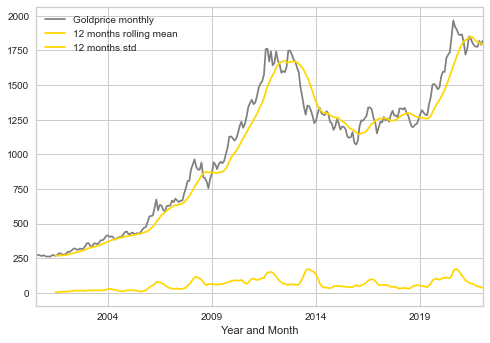

In [106]:
series_gold_month.plot(color="grey",label="Goldprice monthly")
series_gold_month.rolling(12).mean().plot(color="#FFD700",label="12 months rolling mean")
series_gold_month.rolling(12).std().plot(color="#FFD700",label="12 months std")
plt.legend();
#hide_toggle()

In [107]:
series_rollin=series_rollin.to_frame()

In [108]:
series_rollin=series_rollin.dropna(axis=0)

In [109]:
series_rollin.tail()

,Gold
Year and Month,
2021-09-01,1818.917961
2021-10-01,1808.597903
2021-11-01,1804.609796
2021-12-01,1798.922296
2022-01-01,1795.156423


#### Erneute Durchführung des adfuller-Tests für Monatsdaten

In [110]:
adfuller_test(series_rollin["Gold"])

ADF Test Statistic : -1.3437778166552807
p-value : 0.6089136928903415
#Lags Used : 14
Number of Observations Used : 232
Daten sind wahrscheinlich nicht stationär


In [111]:
ndiffs(series_rollin.Gold, test="adf")

1

In [112]:
diff_month = series_rollin.Gold.diff().dropna()

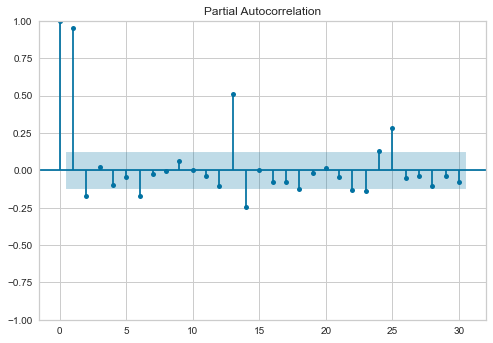

In [113]:
sm.graphics.tsa.plot_pacf(diff_month, lags=30);
#p: 1

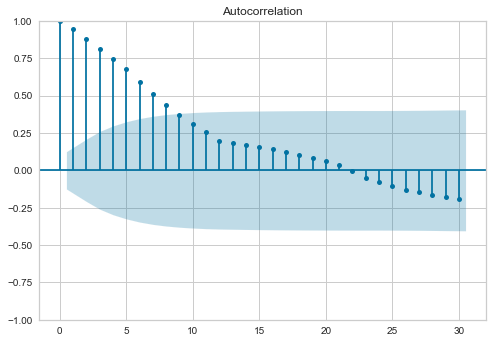

In [114]:
sm.graphics.tsa.plot_acf(diff_month, lags=30);
#q: 1

In [115]:
model_arima_month=ARIMA(series_rollin,order=(1,1,1),freq="MS")
model_arima_fit_month=model_arima_month.fit()

In [116]:
print(model_arima_fit_month.summary())

                               SARIMAX Results                                
Dep. Variable:                   Gold   No. Observations:                  247
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -721.698
Date:                Thu, 24 Feb 2022   AIC                           1449.396
Time:                        22:03:14   BIC                           1459.912
Sample:                    07-01-2001   HQIC                          1453.630
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9377      0.020     47.697      0.000       0.899       0.976
ma.L1          0.1669      0.055      3.042      0.002       0.059       0.274
sigma2        20.4849      1.787     11.463      0.0

#### Interpretation der Ergebnisse

+ Variablen mit p > 0.05 sind nicht statistisch relevant.
+ Prob(Q) > 0.05 bedeutet, dass die Nullhypthose des weißen Rauschens für die Fehler nicht abgelehnt werden kann.
    * "Realisationen von weißem Rauschen haben einen Erwartungswert von null, eine endliche und konstante Varianz und die Autokovarianzen sind gleich null." [6]
+ Heteroskedaszität: Test auf Nullhypthoese, dass die Varianz der Störterme konstant ist.
    * in diesem Fall deutet das Ergebnis auf eine geringe Varianz der Störterme vorhanden ist.
+ Jarque-Bera: Test auf Normalverteilung.
    * nierdiger Wert und Prob(JB) von 0.61 deutet auf Normalverteilung der Daten hin.

#### Vorbereitung und Darstellung der Vorhersage auf Basis der Monatsdaten

In [117]:
forecast_arima_month=model_arima_fit_month.forecast(steps=12)
forecast_arima_month

2022-02-01    1791.967137
2022-03-01    1788.976501
2022-04-01    1786.172141
2022-05-01    1783.542456
2022-06-01    1781.076564
2022-07-01    1778.764265
2022-08-01    1776.595991
2022-09-01    1774.562771
2022-10-01    1772.656194
2022-11-01    1770.868371
2022-12-01    1769.191905
2023-01-01    1767.619861
Freq: MS, Name: predicted_mean, dtype: float64

In [118]:
df_arima_month=forecast_arima_month.to_frame()
df_arima_month=df_arima_month.rename(columns={0: "Gold_forecast"})
df_arima_month.head()

,predicted_mean
2022-02-01,1791.967137
2022-03-01,1788.976501
2022-04-01,1786.172141
2022-05-01,1783.542456
2022-06-01,1781.076564


In [119]:
frames = [series_rollin, df_arima_month]
gold_forecast_month=pd.concat(frames)

In [120]:
gold_forecast_month.tail(13)

,Gold,predicted_mean
2022-01-01,1795.156423,NaN
2022-02-01,NaN,1791.967137
2022-03-01,NaN,1788.976501
2022-04-01,NaN,1786.172141
2022-05-01,NaN,1783.542456
2022-06-01,NaN,1781.076564
2022-07-01,NaN,1778.764265
2022-08-01,NaN,1776.595991
2022-09-01,NaN,1774.562771
2022-10-01,NaN,1772.656194


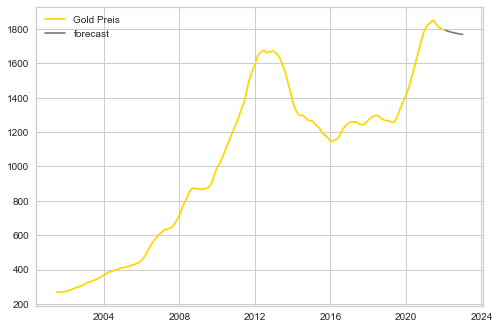

In [121]:
plt.plot(gold_forecast_month["Gold"],color="#FFD700",label="Gold Preis")
plt.plot(gold_forecast_month["predicted_mean"],color="grey", label="forecast");
plt.legend();
#hide_toggle()

bei Monatsdaten sagt Arima sinkenden Goldpreis voraus. Wahrschenlich nicht plausibel, da Monatsdaten noch schwerer vorauszusagen sind als Tagesdaten (da längerer Zeithorizont bei Monatsdaten)

### Fazit zur Modellierung mit ARIMA

+ Modellierung eignet sich prinzipiell gut für die Vorhersage von Zeitreihen.
+ Da der Goldpreis allerdings von mehr Faktoren als nur der Zeit abhängt, weisen die vorhergesagten Werte eine signifikante Abweichung zu den tatsächlichen Daten auf, je weiter die Vorhersage in die Zukunft geht.
+ Vorhersage zu statisch.

## Zeitreihen Untersuchung (Time Series) mit LSTM

Long short-term memory neuronales Netz

In [122]:
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import tensorflow as tf
import random as rn

In [123]:
np.random.seed(101) 
tf.random.set_seed(101) 
rn.seed(101)

In [124]:
#covert to numpy array
train_gold = df_gold.loc[:"2018"].values
test_gold = df_gold.loc["2019":].values

### Normalisierung mit dem MinMaxScaler

In [125]:
sc = MinMaxScaler(feature_range=(0,1))
train_gold_scaled = sc.fit_transform(train_gold)
test_gold_scaled = sc.transform (test_gold)

### Auswahl des Modells

In [126]:
train_generator=TimeseriesGenerator(train_gold_scaled,train_gold_scaled,length=7,batch_size=20,shuffle=False)
test_generator=TimeseriesGenerator(test_gold_scaled,test_gold_scaled,length=7,batch_size=1,shuffle=False)

In [127]:
model = Sequential()
#nummer der neuronen im LSTM 
n_layer = 50
# lags in der time series
n_lag = 7
model.add(LSTM(n_layer,activation="relu",input_shape=(n_lag,1)))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")
num_epochs = 10
model.fit_generator(train_generator, epochs=num_epochs, verbose=1)
prediction_scaled = model.predict_generator(test_generator)

Epoch 1/10
230/230 [==============================] - 6s 10ms/step - loss: 0.0239
Epoch 2/10
230/230 [==============================] - 2s 8ms/step - loss: 1.8477e-04
Epoch 3/10
230/230 [==============================] - 2s 8ms/step - loss: 1.7465e-04
Epoch 4/10
230/230 [==============================] - 2s 8ms/step - loss: 1.7266e-04
Epoch 5/10
230/230 [==============================] - 3s 11ms/step - loss: 1.7491e-04
Epoch 6/10
230/230 [==============================] - 2s 9ms/step - loss: 1.9683e-04
Epoch 7/10
230/230 [==============================] - 2s 7ms/step - loss: 2.3690e-04
Epoch 8/10
230/230 [==============================] - 2s 8ms/step - loss: 1.9035e-04
Epoch 9/10
230/230 [==============================] - 2s 7ms/step - loss: 1.8171e-04
Epoch 10/10
230/230 [==============================] - 2s 8ms/step - loss: 1.8644e-04


In [128]:
train_gold_rescaled=sc.inverse_transform(train_gold_scaled)
test_gold_rescaled=sc.inverse_transform(test_gold_scaled)
prediction_rescaled=sc.inverse_transform(prediction_scaled)

In [129]:
train_gold_result = train_gold_rescaled.reshape((-1))
test_gold_result = test_gold_rescaled.ravel()
prediction_result = prediction_rescaled.reshape((-1))

In [130]:
train_gold_date = df_gold.loc[:"2018"]
test_gold_date = df_gold.loc["2019":]

In [131]:
train_gold_date=train_gold_date.reset_index()["Date"]
test_gold_date=test_gold_date.reset_index()["Date"]

In [132]:
train_gold_date=train_gold_date.to_frame()
test_gold_date=test_gold_date.to_frame()

In [133]:
train_gold_df=pd.DataFrame(data=train_gold_rescaled,columns=["train_gold"]) 

In [134]:
test_gold_df=pd.DataFrame(data=test_gold_rescaled,columns=["test_gold"])

### Vorhersage auf Basis der Trainings-/Testdaten

In [135]:
prediction_result_df=pd.DataFrame(data=prediction_result,columns=["prediction_gold"]) 

In [136]:
train_gold_df=pd.concat([train_gold_date, train_gold_df.reindex(train_gold_date.index)], axis=1)

In [137]:
test_gold_df=pd.concat([test_gold_date, test_gold_df.reindex(test_gold_date.index)], axis=1)

In [138]:
prediction_gold_df=pd.concat([test_gold_date, prediction_result_df.reindex(test_gold_date.index)], axis=1)

In [139]:
df_test_prediction = test_gold_df.merge(prediction_gold_df, on="Date")

In [140]:
df_test_prediction =df_test_prediction.set_index("Date")

In [141]:
df_test_prediction.head()

,test_gold,prediction_gold
Date,,
2019-01-02,1281.000000,1291.084839
2019-01-03,1291.800049,1291.739746
2019-01-04,1282.699951,1291.832520
2019-01-07,1286.800049,1292.089966
2019-01-08,1283.199951,1293.076538


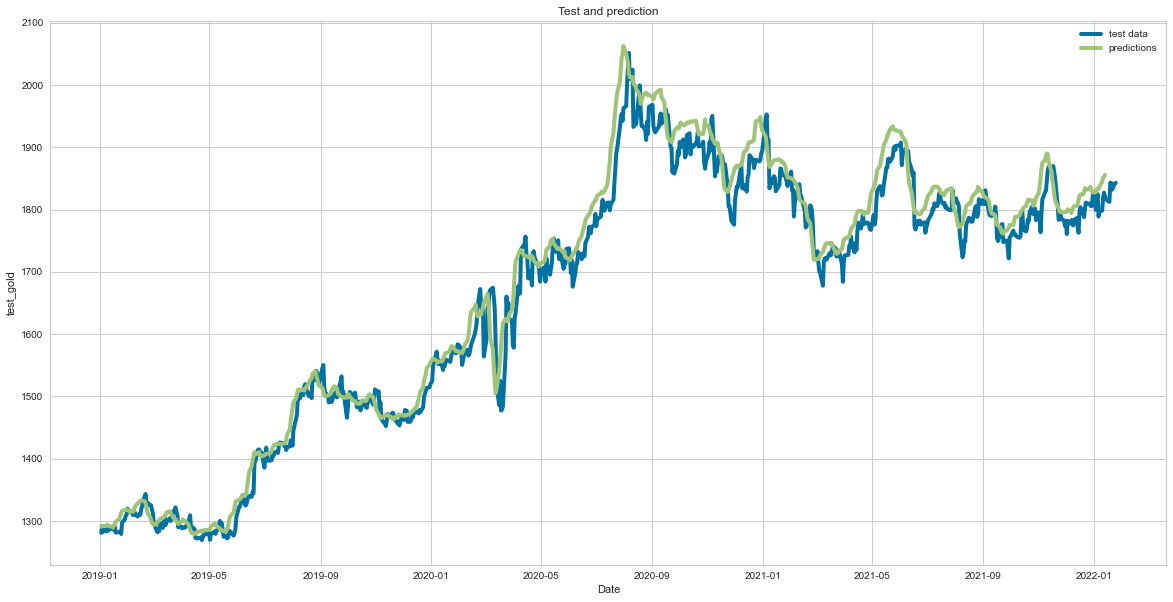

In [142]:
plt.figure(figsize=(20,10))
sns.lineplot(x=df_test_prediction.index, y="test_gold", data=df_test_prediction, linewidth=4, label="test data").set_title("Test and prediction")
sns.lineplot(x=df_test_prediction.index, y="prediction_gold", data=df_test_prediction, linewidth=4, label="predictions");

### Forecast

In [143]:
model = Sequential()
#nummer der neuronen im LSTM 
n_layer = 50
# lags in der time series
n_lag = 7
model.add(LSTM(n_layer,activation="relu",input_shape=(n_lag,1)))
n_forecast = 30
model.add(Dense(n_forecast))
model.compile(optimizer="adam", loss="mse")
num_epochs = 10
model.fit_generator(train_generator, epochs=num_epochs, verbose=1)
prediction_scaled = model.predict_generator(test_generator)

Epoch 1/10
230/230 [==============================] - 4s 7ms/step - loss: 0.0458
Epoch 2/10
230/230 [==============================] - 2s 8ms/step - loss: 6.3867e-04
Epoch 3/10
230/230 [==============================] - 1s 6ms/step - loss: 2.8031e-04
Epoch 4/10
230/230 [==============================] - 1s 6ms/step - loss: 2.5163e-04
Epoch 5/10
230/230 [==============================] - 2s 7ms/step - loss: 2.4903e-04
Epoch 6/10
230/230 [==============================] - 2s 7ms/step - loss: 3.4221e-04
Epoch 7/10
230/230 [==============================] - 2s 6ms/step - loss: 2.3218e-04
Epoch 8/10
230/230 [==============================] - 2s 7ms/step - loss: 2.3451e-04
Epoch 9/10
230/230 [==============================] - 2s 8ms/step - loss: 2.4492e-04
Epoch 10/10
230/230 [==============================] - 2s 7ms/step - loss: 3.0324e-04


In [144]:
x= test_gold_scaled[- n_lag:]  
x= x.reshape(1, n_lag, 1)
forecast = model.predict(x).reshape(-1, 1)
forecast_scaled = sc.inverse_transform(forecast)

In [145]:
forecast=pd.DataFrame(data=forecast_scaled,columns=["forecast"]) 

In [146]:
df_test_prediction_reset=df_test_prediction.reset_index()
last_date = df_test_prediction_reset["Date"].values[-1]
prediction_dates = pd.date_range(last_date, periods=30).tolist()

In [147]:
forecast_dates=pd.DataFrame(data=prediction_dates,columns=["Date"])
df_forecast_lstm=pd.concat([forecast_dates.reindex(forecast_dates.index),forecast], axis=1)
df_forecast_lstm=df_forecast_lstm.set_index("Date")
df_forecast_lstm=df_forecast_lstm.loc[df_forecast_lstm.index.dropna()]

In [148]:
df_gold.tail()

,Gold
Date,
2022-01-19,1843.099976
2022-01-20,1842.500000
2022-01-21,1831.800049
2022-01-24,1841.699951
2022-01-25,1842.900024


In [149]:
df_forecast_lstm.head(30)

,forecast
Date,
2022-01-25,1831.023560
2022-01-26,1847.041748
2022-01-27,1837.999878
2022-01-28,1838.039307
2022-01-29,1847.800415
2022-01-30,1835.602295
2022-01-31,1832.733765
2022-02-01,1836.189453
2022-02-02,1840.943848


#### Darstellung der Ergebnisse

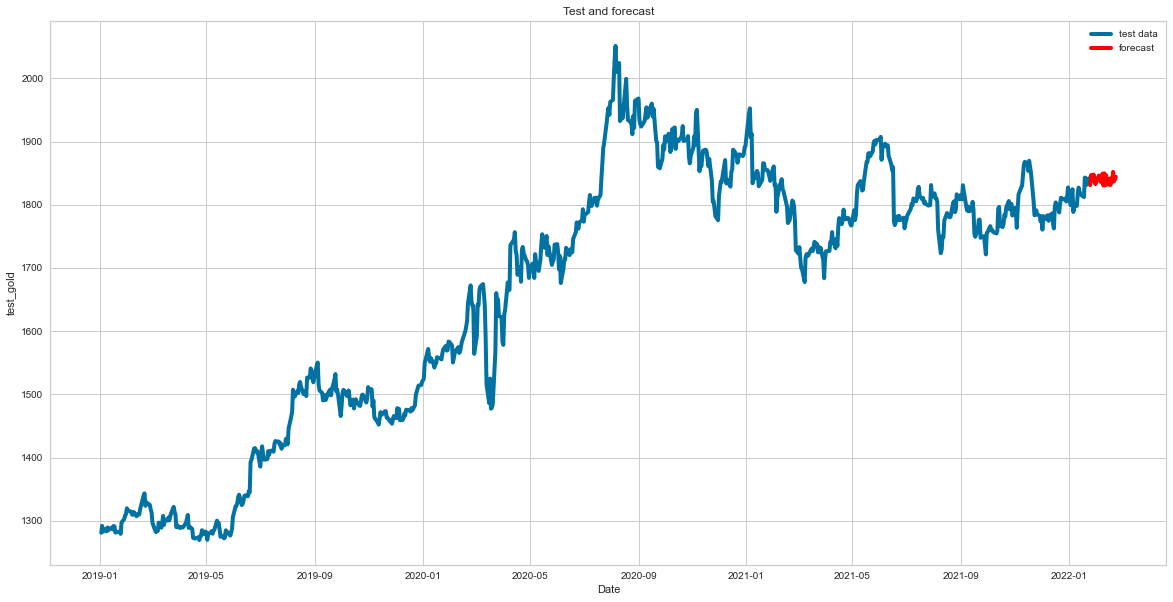

In [150]:
plt.figure(figsize=(20,10))
sns.lineplot(x=df_test_prediction.index, y="test_gold", data=df_test_prediction, linewidth=4, label="test data")
sns.lineplot(x=df_forecast_lstm.index, y="forecast", data=df_forecast_lstm, linewidth=4, label="forecast", color="red").set_title("Test and forecast");

### Fazit zur Modellierung mit LSTM

+ Modellierung eignet sich gut zur Vorhersage von Zeitreihen.
+ Wird aktuell häufig im Zusammenhang mit Zeitreihen-Vorhersagen verwendet, aufgrund der Fähigkeit sich Erfahrungswerte langfristig zu merken.
+ Betrachtet in unserer Modellierung allerdings auch keine äußeren Einflussfaktoren, sondern nur die Zeit.

<br>
<br>
-> Abschließender Vergleich der Modelle im Folgenden.

## Vergleich der Modelle

In [151]:
#Arima
arima_daily=gold_forecast_daily.drop("Gold",axis=1).dropna()

In [152]:
#arima_daily.tail()

In [153]:
#lstm
#df_forecast_lstm.tail()

In [154]:
models_df = pd.concat([arima_daily, df_forecast_lstm], axis=1).dropna()

In [155]:
models_df=models_df.rename(columns={"predicted_mean": "Arima", "forecast": "LSTM"})

In [156]:
models_df_reset=models_df.reset_index()

In [157]:
df_gold_new = yf.download("GC=F",start="2022-01-26", end="2022-02-24")["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [158]:
df_gold_new=df_gold_new.to_frame()

In [159]:
df_gold_compare=df_gold_new.join(models_df, how="outer")

In [160]:
df_gold_compare=df_gold_compare.loc["2022-01-26":]

In [161]:
df_gold_compare["Adj Close"] = df_gold_compare["Adj Close"].fillna(method="bfill")
df_gold_compare["Tatsächlich-Arima"]=((df_gold_compare["Arima"]-df_gold_compare["Adj Close"]))
df_gold_compare["Tatsächlich-LSTM"]=((df_gold_compare["LSTM"]-df_gold_compare["Adj Close"]))
df_gold_compare["Abweichung % Arima"]=((df_gold_compare["Arima"]-df_gold_compare["Adj Close"])/df_gold_compare["Adj Close"]*100)
df_gold_compare["Abweichung % LSTM"]=((df_gold_compare["LSTM"]-df_gold_compare["Adj Close"])/df_gold_compare["Adj Close"]*100)

In [162]:
df_gold_compare

,Adj Close,Arima,LSTM,Tatsächlich-Arima,Tatsächlich-LSTM,Abweichung % Arima,Abweichung % LSTM
2022-01-26,1829.900024,1843.180679,1847.041748,13.280655,17.141724,0.725759,0.936757
2022-01-27,1793.300049,1843.473144,1837.999878,50.173095,44.699829,2.797808,2.492602
2022-01-28,1784.900024,1843.765457,1838.039307,58.865433,53.139282,3.297968,2.977157
2022-01-29,1795.000000,1844.057772,1847.800415,49.057772,52.800415,2.733024,2.941527
2022-01-30,1795.000000,1844.350087,1835.602295,49.350087,40.602295,2.749308,2.261966
2022-01-31,1795.000000,1844.642402,1832.733765,49.642402,37.733765,2.765593,2.102160
2022-02-01,1800.300049,1844.934716,1836.189453,44.634668,35.889404,2.479290,1.993523
2022-02-02,1809.199951,1845.227031,1840.943848,36.027080,31.743896,1.991327,1.754582
2022-02-03,1803.000000,1845.519346,1843.725830,42.519346,40.725830,2.358255,2.258781
2022-02-04,1806.599976,1845.811661,1846.324341,39.211685,39.724365,2.170469,2.198847


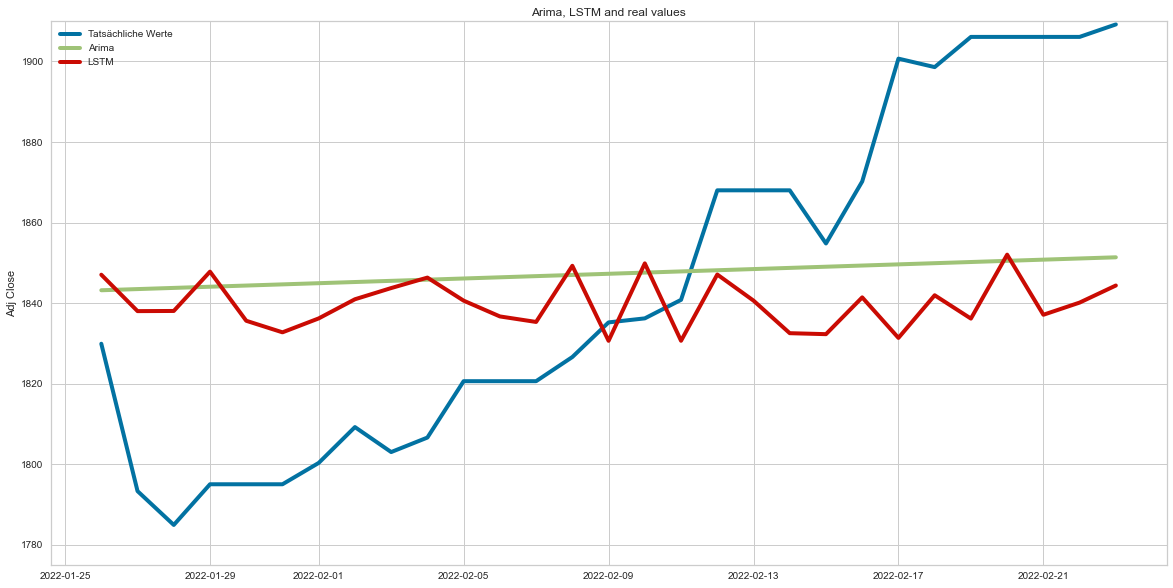

In [163]:
plt.figure(figsize=(20,10))
sns.lineplot(x=df_gold_compare.index, y="Adj Close", data=df_gold_compare, linewidth=4, label="Tatsächliche Werte")
sns.lineplot(x=df_gold_compare.index, y="Arima", data=df_gold_compare, linewidth=4, label="Arima")
sns.lineplot(x=df_gold_compare.index, y="LSTM", data=df_gold_compare, linewidth=4, label="LSTM").set_title("Arima, LSTM and real values")
plt.ylim(1775, 1910);

# 5. Evaluation
*„The mined data is a puzzle that needs to be put together for a business purpose.“ [1]*

<div>
<img src="https://raw.githubusercontent.com/tobiarnold/Gold-price/main/CRISP-DM_E.png" width="450" height="450" align="center"/>
</div>

## Fazit und Ausblick<img src="https://raw.githubusercontent.com/tobiarnold/Gold-price/main/CRISP-DM_E.png" width="100" height="100" align="right"/>

+ Simple Multiple und Random Forest nicht geeignet zur Vorhersage von Zeitreihen. <br><br>
+ ARIMA und LSTM prinzipiell geeignet, aufgrund der unterschiedlichen Einflussfaktoren auf den Goldpreis aber auch nicht zuverlässig in der Prognose. <br><br>
+ Modellierung mit kombinierten Algorithmen als nächster Schritt notwendig.<br><br>
+ Goldpreis entwicklet sich dynamischer als unsere Modelle. <br><br>
+ Einbeziehen von Social Media (Emotionen)/Natural language processing etc.

# Vielen Dank für die Aufmerksamkeit!

# Quellen

[1] 	D. L. Olson und D. Delen, Advanced Data Mining Techniques, Heidelberg: Springer-Verlag, 2008.<br> 
[2] 	A. Hayes, „Multiple Linear Regression (MLR) Definition,“ Investopedia, 02 Januar 2022. [Online]. Available: https://www.investopedia.com/terms/m/mlr.asp. [Zugriff am 10 Februar 2022].<br>
[3] 	M. K. Gurucharan, „Machine Learning Basics: Random Forest Regression | by Gurucharan M K | Towards Data Science,“ Towards Data Science, 18 Juli 2020. [Online]. Available: https://towardsdatascience.com/machine-learning-basics-random-forest-regression-be3e1e3bb91a. [Zugriff am 10 Februar 2022].<br>
[4] 	S. Luber und N. Litzel, „Was ist das ARIMA-Modell?,“ Vogel Communications Group, 23 März 2020. [Online]. Available: https://www.bigdata-insider.de/was-ist-das-arima-modell-a-914956/. [Zugriff am 10 Februar 2022].<br>
[5] 	S. Luber und N. Litzel, „Was ist ein Long Short-Term Memory?,“ Vogel Communications Group, 12 November 2018. [Online]. Available: https://www.bigdata-insider.de/was-ist-ein-long-short-term-memory-a-774848/. [Zugriff am 10 Februar 2022].<br>
[6] 	B. R. Auer, „Gabler Wirtschaftslexikon,“ Springer Fachmedien Wiesbaden GmbH, 19 Februar 2018. [Online]. Available: https://wirtschaftslexikon.gabler.de/definition/weisses-rauschen-50294/version-273515. [Zugriff am 12 Februar 2022].<br>
[7] 	S. Biondi, „Gold - Geschichte des begehrtesten Metall der Menschheit,“ Adeos Media GmbH , 20 März 2020. [Online]. Available: https://www.gold.de/gold-geschichte/. [Zugriff am 13 Februar 2022].<br>
[8] 	P. Pathak, „How to Create an ARIMA Model for Time Series Forecasting in Python?,“ Analytics Vidhya, 29 Oktober 2020. [Online]. Available: https://www.analyticsvidhya.com/blog/2020/10/how-to-create-an-arima-model-for-time-series-forecasting-in-python/. [Zugriff am 13 Februar 2022].<br>
[9] 	C. K.-S. Leung, R. K. MacKinnon und Y. Wang, „A machine learning approach for stock price prediction,“ in IDEAS '14: Proceedings of the 18th International Database Engineering & Applications Symposium, New York, NY, United States, Association for Computing Machinery, 2014, pp. 274-277.<br>
[10] 	B. Guha und G. Bandyopadhyay, „Gold Price Forecasting Using ARIMA Model,“ Journal of Advanced Management Science, Bd. Vol. 4, Nr. No. 2, pp. 117-121, 2016.<br>
[11] 	I. E. Livieris, E. Pintelas und P. Pintelas, „A CNN–LSTM model for gold price time-series forecasting,“ in Neural Computing and Applications, London, Springer-Verlag, 2020, p. 17351–17360.<br>
[12] 	P. Sadrach, „Mastering Time Series Analysis in Python,“ Towards Data Science, 9 August 2021. [Online]. Available: https://towardsdatascience.com/mastering-time-series-analysis-in-python-8219047a0351. [Zugriff am 13 Februar 2022].